In [2]:
%matplotlib inline

In [3]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False

In [4]:
def check_if_connect(genome, config):
    used_nodes = list(genome.nodes.keys())
    # create a dict for mapping 
    l1 = [0] + config.genome_config.input_keys + used_nodes[1:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))
    
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in genome.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
    # 
    v = 0
    list_connections = []
    for u in range(1, len(config.genome_config.input_keys) + 1):
        list_connections.append(g.isReachable(u, v))
    return list_connections

In [5]:
def ad_fit(x):
    #ad_fit = np.exp(x**2)**10*(x**2)
    ad_fit = np.exp(x)**3*(x**2)
    #ad_fit = (x**2)
    return ad_fit

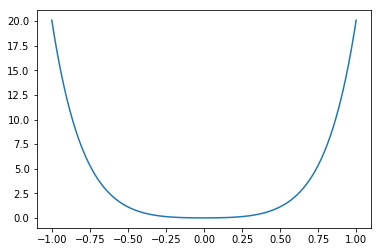

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

x = np.arange(-1.0, 1.01, 0.01)
y = np.exp(np.abs(x))**3*(x**2)
plt.plot(x,y)
plt.show()

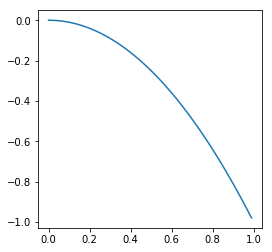

In [7]:
plt.figure(figsize=(4, 4))
x = np.arange(0, 1, 0.01)
y =  - x**2
plt.plot(x,y)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # print(genome_id, check_if_connect(genome, config))
        list_check_if_connect = check_if_connect(genome, config)
        
        # number of ture and false
        number_true = list_check_if_connect.count(True)
        number_false = list_check_if_connect.count(False)
        unconnect_ratio = number_false/(number_true + number_false)
        
        
        # no connections at all
        if (number_true == 0):
            mse = -1
        # there are connections
        else:
            sum_error = 0.0
            for xi, xo in zip(x_inputs, x_outputs):
                output = net.activate(xi)
                error = np.abs(output[0] - xo[0])
                if error > 1:
                    error = 1
                adj_error = ad_fit(error)
                sum_error -= adj_error
                # sum_error -= np.abs(output[0] - xo[0])
            mse = sum_error/samplesize
            mse -= unconnect_ratio**2

        genome.fitness = mse


def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    checkpointer = neat.Checkpointer(1000)
    p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 5000)

    return [stats,winner]

In [9]:
df=pd.read_csv('new_train_X.csv', sep=' ',header=None)
new_train_X = df.values
df=pd.read_csv('new_train_Y.csv', sep=' ',header=None)
new_train_Y = df.values

X_train_inputs = []
Y_train_outputs = []
# L = len(new_train_X)
L = len(new_train_X)
for i in range(L):
    X_train_inputs.append(tuple(new_train_X[i]))
for i in range(L):
    Y_train_outputs.append(tuple(new_train_Y[i]))

x_inputs = X_train_inputs
x_outputs = Y_train_outputs

In [10]:
samplesize = len(x_outputs)

In [11]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-sunspot")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)

    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -2.87366 stdev: 2.41983
Best fitness: -0.22085 - size: (1, 8) - species 1 - id 39
Average adjusted fitness: 0.721
Mean genetic distance 1.761, standard deviation 0.561
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.284 sec

 ****** Running generation 1 ****** 

Population's average fitness: -3.07933 stdev: 4.46791
Best fitness: -0.15689 - size: (1, 8) - species 1 - id 175
Average adjusted fitness: 0.848
Mean genetic distance 2.063, standard deviation 0.700
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.289 sec (0.287 average)

 ****** Running generation 2 ****** 

Population's average fitness: -3.50937 stdev: 5.21725
Best fitness: -0.06545 - size: (2, 9) - species 1 - id 276
Average adjusted fitness: 0.537
Mean genetic distance 2.208, standard deviation 0.596
Population of 100 members in 4 species
Total extinctions: 0
Generation time: 0.302 sec (0.292 ave

Population's average fitness: -3.97706 stdev: 6.65722
Best fitness: -0.05807 - size: (1, 8) - species 2 - id 1714
Average adjusted fitness: 0.817
Mean genetic distance 2.350, standard deviation 0.765
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.331 sec (0.326 average)

 ****** Running generation 25 ****** 

Population's average fitness: -2.21506 stdev: 4.84486
Best fitness: -0.05807 - size: (1, 8) - species 2 - id 1714
Average adjusted fitness: 0.891
Mean genetic distance 2.354, standard deviation 0.772
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.336 sec (0.327 average)

 ****** Running generation 26 ****** 

Population's average fitness: -2.67738 stdev: 5.50093
Best fitness: -0.05807 - size: (1, 8) - species 2 - id 1714
Average adjusted fitness: 0.871
Mean genetic distance 2.351, standard deviation 0.757
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.348 sec (0.329 average)

 ****** Run

Population's average fitness: -4.00015 stdev: 6.94327
Best fitness: -0.05174 - size: (1, 7) - species 4 - id 2730
Average adjusted fitness: 0.829
Mean genetic distance 2.430, standard deviation 0.823
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.369 sec (0.383 average)

 ****** Running generation 49 ****** 

Population's average fitness: -5.55199 stdev: 8.02316
Best fitness: -0.05174 - size: (1, 7) - species 4 - id 2730
Average adjusted fitness: 0.720
Mean genetic distance 2.372, standard deviation 0.829
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.739 sec (0.419 average)

 ****** Running generation 50 ****** 

Population's average fitness: -2.45202 stdev: 5.01456
Best fitness: -0.05174 - size: (1, 7) - species 4 - id 2730
Average adjusted fitness: 0.874
Mean genetic distance 2.467, standard deviation 0.832
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.388 sec (0.420 average)

 ****** Run

Population's average fitness: -3.79800 stdev: 6.57178
Best fitness: -0.05174 - size: (1, 7) - species 4 - id 2730
Average adjusted fitness: 0.817
Mean genetic distance 2.835, standard deviation 0.887
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.551 sec (0.611 average)

 ****** Running generation 73 ****** 

Population's average fitness: -3.76697 stdev: 6.63201
Best fitness: -0.05174 - size: (1, 7) - species 4 - id 2730
Average adjusted fitness: 0.815
Mean genetic distance 2.790, standard deviation 0.853
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.432 sec (0.597 average)

 ****** Running generation 74 ****** 

Population's average fitness: -3.66772 stdev: 6.45084
Best fitness: -0.05174 - size: (1, 7) - species 4 - id 2730
Average adjusted fitness: 0.823
Mean genetic distance 2.786, standard deviation 0.859
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.524 sec (0.561 average)

 ****** Run

Population's average fitness: -2.88315 stdev: 5.78220
Best fitness: -0.04616 - size: (1, 7) - species 4 - id 8439
Average adjusted fitness: 0.859
Mean genetic distance 2.555, standard deviation 0.766
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.734 sec (0.515 average)

 ****** Running generation 97 ****** 

Population's average fitness: -2.83355 stdev: 5.71989
Best fitness: -0.04616 - size: (1, 7) - species 4 - id 8439
Average adjusted fitness: 0.867
Mean genetic distance 2.551, standard deviation 0.728
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.636 sec (0.539 average)

 ****** Running generation 98 ****** 

Population's average fitness: -4.42747 stdev: 7.13154
Best fitness: -0.04616 - size: (1, 7) - species 4 - id 8439
Average adjusted fitness: 0.816
Mean genetic distance 2.545, standard deviation 0.771
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.613 sec (0.561 average)

 ****** Ru

Population's average fitness: -2.10029 stdev: 4.34727
Best fitness: -0.04293 - size: (5, 13) - species 7 - id 10528
Average adjusted fitness: 0.902
Mean genetic distance 2.458, standard deviation 0.741
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.474 sec (0.659 average)

 ****** Running generation 121 ****** 

Population's average fitness: -4.41955 stdev: 7.38490
Best fitness: -0.04293 - size: (5, 13) - species 7 - id 10528
Average adjusted fitness: 0.780
Mean genetic distance 2.485, standard deviation 0.740
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.599 sec (0.670 average)

 ****** Running generation 122 ****** 

Population's average fitness: -4.39236 stdev: 6.72534
Best fitness: -0.04293 - size: (5, 13) - species 7 - id 10528
Average adjusted fitness: 0.784
Mean genetic distance 2.444, standard deviation 0.759
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.455 sec (0.668 average)

 **

Population's average fitness: -3.53654 stdev: 6.28823
Best fitness: -0.04293 - size: (5, 13) - species 7 - id 10528
Average adjusted fitness: 0.829
Mean genetic distance 2.331, standard deviation 0.691
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.701 sec (0.589 average)

 ****** Running generation 145 ****** 

Population's average fitness: -2.62175 stdev: 5.04116
Best fitness: -0.04293 - size: (5, 13) - species 7 - id 10528
Average adjusted fitness: 0.874
Mean genetic distance 2.370, standard deviation 0.684
Population of 98 members in 6 species
Total extinctions: 0
Generation time: 0.810 sec (0.624 average)

 ****** Running generation 146 ****** 

Population's average fitness: -3.49920 stdev: 6.26901
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.829
Mean genetic distance 2.405, standard deviation 0.674
Population of 98 members in 6 species
Total extinctions: 0
Generation time: 0.878 sec (0.665 average)

 ***

Population's average fitness: -4.33124 stdev: 7.17306
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.789
Mean genetic distance 2.354, standard deviation 0.700
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.544 sec (0.622 average)

 ****** Running generation 169 ****** 

Population's average fitness: -3.38255 stdev: 6.26373
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.833
Mean genetic distance 2.311, standard deviation 0.697
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.682 sec (0.642 average)

 ****** Running generation 170 ****** 

Population's average fitness: -3.91885 stdev: 6.39294
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.807
Mean genetic distance 2.299, standard deviation 0.683
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.732 sec (0.651 average)

 *

Population's average fitness: -4.83176 stdev: 7.43501
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.766
Mean genetic distance 2.363, standard deviation 0.676
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.594 sec (0.532 average)

 ****** Running generation 193 ****** 

Population's average fitness: -3.49558 stdev: 6.45322
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.825
Mean genetic distance 2.332, standard deviation 0.709
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.590 sec (0.546 average)

 ****** Running generation 194 ****** 

Population's average fitness: -3.39592 stdev: 6.40404
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.845
Mean genetic distance 2.190, standard deviation 0.813
Population of 101 members in 5 species
Total extinctions: 0
Generation time: 0.579 sec (0.556 average)

 *

Population's average fitness: -4.25008 stdev: 6.99923
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.769
Mean genetic distance 2.685, standard deviation 0.603
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.491 sec (0.499 average)

 ****** Running generation 217 ****** 

Population's average fitness: -3.54884 stdev: 6.18972
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.802
Mean genetic distance 2.660, standard deviation 0.602
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.490 sec (0.501 average)

 ****** Running generation 218 ****** 

Population's average fitness: -3.51740 stdev: 5.87622
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.830
Mean genetic distance 2.678, standard deviation 0.643
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.494 sec (0.505 average)

 **

Population's average fitness: -3.38138 stdev: 6.43649
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.833
Mean genetic distance 2.908, standard deviation 0.763
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.532 sec (0.523 average)

 ****** Running generation 241 ****** 

Population's average fitness: -2.20445 stdev: 5.03313
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.904
Mean genetic distance 2.900, standard deviation 0.763
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.539 sec (0.528 average)

 ****** Running generation 242 ****** 

Population's average fitness: -3.87810 stdev: 6.47872
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.809
Mean genetic distance 2.917, standard deviation 0.726
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.542 sec (0.533 average)

 *

Population's average fitness: -3.40471 stdev: 6.44591
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.829
Mean genetic distance 2.939, standard deviation 0.725
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.927 sec (0.677 average)

 ****** Running generation 265 ****** 

Population's average fitness: -4.13186 stdev: 6.78410
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.792
Mean genetic distance 2.894, standard deviation 0.722
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.998 sec (0.710 average)

 ****** Running generation 266 ****** 

Population's average fitness: -3.60349 stdev: 6.50584
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.826
Mean genetic distance 2.918, standard deviation 0.765
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.568 sec (0.714 average)

 **

Population's average fitness: -3.52475 stdev: 6.11608
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.824
Mean genetic distance 3.006, standard deviation 0.793
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.698 sec (0.627 average)

 ****** Running generation 289 ****** 

Population's average fitness: -4.05347 stdev: 6.52242
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.802
Mean genetic distance 2.983, standard deviation 0.788
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.068 sec (0.681 average)

 ****** Running generation 290 ****** 

Population's average fitness: -3.95385 stdev: 6.65461
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.805
Mean genetic distance 2.978, standard deviation 0.780
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.961 sec (0.723 average)



Population's average fitness: -2.45354 stdev: 4.93705
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.847
Mean genetic distance 2.974, standard deviation 0.723
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.631 sec (0.575 average)

 ****** Running generation 313 ****** 

Population's average fitness: -3.91088 stdev: 6.82388
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.824
Mean genetic distance 2.892, standard deviation 0.699
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.616 sec (0.581 average)

 ****** Running generation 314 ****** 

Population's average fitness: -3.05963 stdev: 5.42930
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.851
Mean genetic distance 2.877, standard deviation 0.705
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.817 sec (0.604 average)



Population's average fitness: -4.17312 stdev: 7.04447
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.794
Mean genetic distance 2.838, standard deviation 0.767
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.719 sec (0.714 average)

 ****** Running generation 337 ****** 

Population's average fitness: -3.18423 stdev: 5.96371
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.843
Mean genetic distance 2.863, standard deviation 0.751
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.654 sec (0.722 average)

 ****** Running generation 338 ****** 

Population's average fitness: -2.89834 stdev: 5.54753
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.856
Mean genetic distance 2.854, standard deviation 0.760
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.842 sec (0.751 average)

 *

Population's average fitness: -3.68010 stdev: 6.51377
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.819
Mean genetic distance 2.839, standard deviation 0.750
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 1.206 sec (0.995 average)

 ****** Running generation 361 ****** 

Population's average fitness: -2.71713 stdev: 5.39016
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.865
Mean genetic distance 2.802, standard deviation 0.721
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.083 sec (1.013 average)

 ****** Running generation 362 ****** 

Population's average fitness: -3.84760 stdev: 6.12481
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.812
Mean genetic distance 2.838, standard deviation 0.718
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.056 sec (1.012 average)

 *

Population's average fitness: -3.13777 stdev: 5.86973
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.854
Mean genetic distance 2.847, standard deviation 0.772
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.599 sec (0.640 average)

 ****** Running generation 385 ****** 

Population's average fitness: -3.44123 stdev: 6.23637
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.826
Mean genetic distance 2.856, standard deviation 0.742
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.608 sec (0.634 average)

 ****** Running generation 386 ****** 

Population's average fitness: -3.82167 stdev: 6.66598
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.810
Mean genetic distance 2.884, standard deviation 0.725
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.612 sec (0.626 average)

 **

Population's average fitness: -3.64949 stdev: 6.54759
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.820
Mean genetic distance 2.786, standard deviation 0.763
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.649 sec (0.690 average)

 ****** Running generation 409 ****** 

Population's average fitness: -3.11916 stdev: 6.00601
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.842
Mean genetic distance 2.796, standard deviation 0.759
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.636 sec (0.692 average)

 ****** Running generation 410 ****** 

Population's average fitness: -3.52794 stdev: 6.77063
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.825
Mean genetic distance 2.814, standard deviation 0.737
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.675 sec (0.696 average)

 **

Population's average fitness: -3.11038 stdev: 6.36412
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.832
Mean genetic distance 2.725, standard deviation 0.704
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.706 sec (0.691 average)

 ****** Running generation 433 ****** 

Population's average fitness: -2.32662 stdev: 4.98286
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.873
Mean genetic distance 2.792, standard deviation 0.706
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.657 sec (0.689 average)

 ****** Running generation 434 ****** 

Population's average fitness: -2.53052 stdev: 5.21648
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.873
Mean genetic distance 2.791, standard deviation 0.701
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.643 sec (0.686 average)

 ****

Population's average fitness: -4.27046 stdev: 6.90972
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.789
Mean genetic distance 2.511, standard deviation 0.682
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.604 sec (0.700 average)

 ****** Running generation 457 ****** 

Population's average fitness: -4.27533 stdev: 7.14403
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.799
Mean genetic distance 2.576, standard deviation 0.630
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.612 sec (0.697 average)

 ****** Running generation 458 ****** 

Population's average fitness: -3.61750 stdev: 6.14262
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.822
Mean genetic distance 2.608, standard deviation 0.657
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.619 sec (0.697 average)

 ***

Population's average fitness: -2.28532 stdev: 4.75617
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.884
Mean genetic distance 2.745, standard deviation 0.692
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.818 sec (0.816 average)

 ****** Running generation 481 ****** 

Population's average fitness: -2.17719 stdev: 4.82470
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.877
Mean genetic distance 2.749, standard deviation 0.731
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.813 sec (0.832 average)

 ****** Running generation 482 ****** 

Population's average fitness: -3.15531 stdev: 5.95245
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.842
Mean genetic distance 2.775, standard deviation 0.701
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.795 sec (0.845 average)

 ***

Population's average fitness: -3.90283 stdev: 6.36636
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.797
Mean genetic distance 2.878, standard deviation 0.657
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 1.247 sec (0.847 average)

 ****** Running generation 505 ****** 

Population's average fitness: -3.88262 stdev: 6.44186
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.810
Mean genetic distance 2.847, standard deviation 0.657
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.836 sec (0.857 average)

 ****** Running generation 506 ****** 

Population's average fitness: -2.85619 stdev: 5.67182
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.863
Mean genetic distance 2.822, standard deviation 0.677
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.870 sec (0.875 average)

 *

Population's average fitness: -3.51810 stdev: 5.60402
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.825
Mean genetic distance 2.725, standard deviation 0.657
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.781 sec (0.881 average)

 ****** Running generation 529 ****** 

Population's average fitness: -2.72607 stdev: 5.23635
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.866
Mean genetic distance 2.764, standard deviation 0.654
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.932 sec (0.902 average)

 ****** Running generation 530 ****** 

Population's average fitness: -3.15945 stdev: 6.04650
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.838
Mean genetic distance 2.694, standard deviation 0.696
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.841 sec (0.867 average)

 **

Population's average fitness: -4.29036 stdev: 6.66803
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.776
Mean genetic distance 2.696, standard deviation 0.643
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.784 sec (0.966 average)

 ****** Running generation 553 ****** 

Population's average fitness: -3.08710 stdev: 5.41312
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.843
Mean genetic distance 2.701, standard deviation 0.662
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.756 sec (0.971 average)

 ****** Running generation 554 ****** 

Population's average fitness: -4.67053 stdev: 6.97035
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.770
Mean genetic distance 2.681, standard deviation 0.665
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.740 sec (0.972 average)

 ***

Population's average fitness: -3.05624 stdev: 5.23241
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.848
Mean genetic distance 2.710, standard deviation 0.577
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.700 sec (0.718 average)

 ****** Running generation 577 ****** 

Population's average fitness: -3.19276 stdev: 5.39661
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.818
Mean genetic distance 2.760, standard deviation 0.597
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.723 sec (0.718 average)

 ****** Running generation 578 ****** 

Population's average fitness: -3.45773 stdev: 5.54687
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.823
Mean genetic distance 2.763, standard deviation 0.639
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.708 sec (0.719 average)

 **

Population's average fitness: -3.31036 stdev: 5.29122
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.835
Mean genetic distance 2.854, standard deviation 0.696
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.768 sec (0.826 average)

 ****** Running generation 601 ****** 

Population's average fitness: -3.48599 stdev: 5.86364
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.825
Mean genetic distance 2.872, standard deviation 0.731
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.750 sec (0.830 average)

 ****** Running generation 602 ****** 

Population's average fitness: -4.18432 stdev: 6.51782
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.794
Mean genetic distance 2.871, standard deviation 0.713
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.722 sec (0.823 average)


Population's average fitness: -4.11000 stdev: 6.27647
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.793
Mean genetic distance 2.895, standard deviation 0.698
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 2.181 sec (1.167 average)

 ****** Running generation 625 ****** 

Population's average fitness: -4.14070 stdev: 5.98953
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.795
Mean genetic distance 2.894, standard deviation 0.697
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.875 sec (1.178 average)

 ****** Running generation 626 ****** 

Population's average fitness: -2.87907 stdev: 4.88597
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.851
Mean genetic distance 2.907, standard deviation 0.692
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 1.076 sec (1.214 average)


Population's average fitness: -3.85786 stdev: 6.34534
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.810
Mean genetic distance 2.837, standard deviation 0.684
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.731 sec (0.735 average)

 ****** Running generation 649 ****** 

Population's average fitness: -2.55934 stdev: 5.08950
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.881
Mean genetic distance 2.765, standard deviation 0.717
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.727 sec (0.736 average)

 ****** Running generation 650 ****** 

Population's average fitness: -2.88866 stdev: 5.51321
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.855
Mean genetic distance 2.769, standard deviation 0.709
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.811 sec (0.748 average)

 **

Population's average fitness: -4.20712 stdev: 6.84313
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.772
Mean genetic distance 2.894, standard deviation 0.641
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.797 sec (0.717 average)

 ****** Running generation 673 ****** 

Population's average fitness: -3.40837 stdev: 5.21901
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.834
Mean genetic distance 2.886, standard deviation 0.632
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.693 sec (0.715 average)

 ****** Running generation 674 ****** 

Population's average fitness: -4.39014 stdev: 6.37388
Best fitness: -0.03223 - size: (6, 15) - species 7 - id 13647
Average adjusted fitness: 0.781
Mean genetic distance 2.886, standard deviation 0.638
Population of 103 members in 13 species
Total extinctions: 0
Generation time: 0.703 sec (0.716 average)

 

Population's average fitness: -3.25496 stdev: 5.27210
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.843
Mean genetic distance 2.842, standard deviation 0.660
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.662 sec (0.715 average)

 ****** Running generation 697 ****** 

Population's average fitness: -4.15097 stdev: 6.22655
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.796
Mean genetic distance 2.820, standard deviation 0.638
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.684 sec (0.709 average)

 ****** Running generation 698 ****** 

Population's average fitness: -4.16172 stdev: 6.28239
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.796
Mean genetic distance 2.819, standard deviation 0.644
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.735 sec (0.716 average)

Population's average fitness: -2.60646 stdev: 4.90431
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.886
Mean genetic distance 2.826, standard deviation 0.685
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.650 sec (0.645 average)

 ****** Running generation 721 ****** 

Population's average fitness: -4.59547 stdev: 6.87583
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.789
Mean genetic distance 2.762, standard deviation 0.733
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.627 sec (0.644 average)

 ****** Running generation 722 ****** 

Population's average fitness: -3.43303 stdev: 5.93330
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.829
Mean genetic distance 2.801, standard deviation 0.747
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.623 sec (0.643 average)



Population's average fitness: -3.10822 stdev: 5.53851
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.847
Mean genetic distance 2.966, standard deviation 0.704
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 0.799 sec (0.752 average)

 ****** Running generation 745 ****** 

Population's average fitness: -2.94593 stdev: 5.55790
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.864
Mean genetic distance 2.973, standard deviation 0.685
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 1.598 sec (0.843 average)

 ****** Running generation 746 ****** 

Population's average fitness: -4.13551 stdev: 6.73784
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.797
Mean genetic distance 2.933, standard deviation 0.690
Population of 101 members in 13 species
Total extinctions: 0
Generation time: 1.332 sec (0.906 average

Population's average fitness: -3.15356 stdev: 5.97556
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.837
Mean genetic distance 2.975, standard deviation 0.675
Population of 104 members in 14 species
Total extinctions: 0
Generation time: 0.981 sec (1.062 average)

 ****** Running generation 769 ****** 

Population's average fitness: -4.29956 stdev: 6.78155
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.783
Mean genetic distance 2.976, standard deviation 0.677
Population of 99 members in 14 species
Total extinctions: 0
Generation time: 0.846 sec (1.063 average)

 ****** Running generation 770 ****** 

Population's average fitness: -3.10597 stdev: 5.96167
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.829
Mean genetic distance 2.892, standard deviation 0.660
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.780 sec (1.056 average)

Population's average fitness: -4.89214 stdev: 7.48528
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.760
Mean genetic distance 2.800, standard deviation 0.712
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.799 sec (0.967 average)

 ****** Running generation 793 ****** 

Population's average fitness: -3.82656 stdev: 6.57563
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.809
Mean genetic distance 2.828, standard deviation 0.679
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.873 sec (0.927 average)

 ****** Running generation 794 ****** 

Population's average fitness: -3.28747 stdev: 5.88809
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.834
Mean genetic distance 2.820, standard deviation 0.665
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.798 sec (0.897 average)



Population's average fitness: -3.07092 stdev: 5.34967
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.854
Mean genetic distance 2.841, standard deviation 0.716
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.692 sec (0.801 average)

 ****** Running generation 817 ****** 

Population's average fitness: -4.19199 stdev: 6.53270
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.795
Mean genetic distance 2.859, standard deviation 0.716
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.680 sec (0.784 average)

 ****** Running generation 818 ****** 

Population's average fitness: -2.65274 stdev: 4.89070
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.867
Mean genetic distance 2.899, standard deviation 0.693
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 1.113 sec (0.803 average)

 

Population's average fitness: -4.36930 stdev: 6.66229
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.776
Mean genetic distance 2.817, standard deviation 0.691
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.769 sec (0.719 average)

 ****** Running generation 841 ****** 

Population's average fitness: -3.65009 stdev: 6.37184
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.818
Mean genetic distance 2.817, standard deviation 0.643
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 1.473 sec (0.793 average)

 ****** Running generation 842 ****** 

Population's average fitness: -4.32153 stdev: 6.91091
Best fitness: -0.03120 - size: (2, 10) - species 27 - id 62690
Average adjusted fitness: 0.782
Mean genetic distance 2.823, standard deviation 0.639
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.766 sec (0.793 average

Population's average fitness: -2.92283 stdev: 4.81538
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.848
Mean genetic distance 2.801, standard deviation 0.676
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.698 sec (0.876 average)

 ****** Running generation 865 ****** 

Population's average fitness: -3.22244 stdev: 5.80426
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.834
Mean genetic distance 2.833, standard deviation 0.666
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.736 sec (0.828 average)

 ****** Running generation 866 ****** 

Population's average fitness: -5.29555 stdev: 7.30231
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.731
Mean genetic distance 2.819, standard deviation 0.664
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.206 sec (0.848 average)



Population's average fitness: -4.72465 stdev: 6.71356
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.767
Mean genetic distance 2.760, standard deviation 0.666
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.732 sec (0.868 average)

 ****** Running generation 889 ****** 

Population's average fitness: -5.47085 stdev: 7.00068
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.726
Mean genetic distance 2.780, standard deviation 0.658
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.745 sec (0.871 average)

 ****** Running generation 890 ****** 

Population's average fitness: -2.87106 stdev: 4.84024
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.859
Mean genetic distance 2.764, standard deviation 0.655
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.745 sec (0.858 average)



Population's average fitness: -2.76391 stdev: 4.99034
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.864
Mean genetic distance 2.681, standard deviation 0.665
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.714 sec (0.733 average)

 ****** Running generation 913 ****** 

Population's average fitness: -3.96142 stdev: 6.28151
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.804
Mean genetic distance 2.678, standard deviation 0.693
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.725 sec (0.725 average)

 ****** Running generation 914 ****** 

Population's average fitness: -3.12516 stdev: 5.42840
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.847
Mean genetic distance 2.709, standard deviation 0.703
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.753 sec (0.727 average)


Population's average fitness: -3.31553 stdev: 5.49458
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.837
Mean genetic distance 2.676, standard deviation 0.634
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.829 sec (0.753 average)

 ****** Running generation 937 ****** 

Population's average fitness: -3.69031 stdev: 5.43819
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.814
Mean genetic distance 2.657, standard deviation 0.620
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 1.361 sec (0.820 average)

 ****** Running generation 938 ****** 

Population's average fitness: -4.31602 stdev: 6.68282
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.777
Mean genetic distance 2.617, standard deviation 0.555
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 1.188 sec (0.865 average)


Population's average fitness: -2.88629 stdev: 5.30662
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.857
Mean genetic distance 2.877, standard deviation 0.610
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.637 sec (0.938 average)

 ****** Running generation 961 ****** 

Population's average fitness: -4.50996 stdev: 6.69673
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.778
Mean genetic distance 2.905, standard deviation 0.617
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 1.047 sec (0.965 average)

 ****** Running generation 962 ****** 

Population's average fitness: -2.38257 stdev: 4.17933
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.874
Mean genetic distance 2.901, standard deviation 0.663
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.792 sec (0.978 average

Population's average fitness: -3.93792 stdev: 6.29598
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.805
Mean genetic distance 2.913, standard deviation 0.692
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.721 sec (0.667 average)

 ****** Running generation 985 ****** 

Population's average fitness: -2.96595 stdev: 5.16080
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.854
Mean genetic distance 2.912, standard deviation 0.684
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.628 sec (0.662 average)

 ****** Running generation 986 ****** 

Population's average fitness: -3.92724 stdev: 6.36374
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.801
Mean genetic distance 2.914, standard deviation 0.692
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.635 sec (0.656 average)


Population's average fitness: -4.43689 stdev: 6.51834
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.779
Mean genetic distance 2.787, standard deviation 0.701
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.685 sec (0.668 average)

 ****** Running generation 1009 ****** 

Population's average fitness: -3.36002 stdev: 5.14282
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.833
Mean genetic distance 2.771, standard deviation 0.690
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.648 sec (0.666 average)

 ****** Running generation 1010 ****** 

Population's average fitness: -3.38334 stdev: 5.58299
Best fitness: -0.02947 - size: (9, 18) - species 62 - id 78765
Average adjusted fitness: 0.836
Mean genetic distance 2.786, standard deviation 0.680
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.649 sec (0.664 average)



Population's average fitness: -3.29767 stdev: 5.20601
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.840
Mean genetic distance 2.631, standard deviation 0.659
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.656 sec (0.690 average)

 ****** Running generation 1033 ****** 

Population's average fitness: -2.77234 stdev: 5.11294
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.864
Mean genetic distance 2.608, standard deviation 0.664
Population of 102 members in 6 species
Total extinctions: 0
Generation time: 0.663 sec (0.683 average)

 ****** Running generation 1034 ****** 

Population's average fitness: -4.03801 stdev: 6.49626
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.798
Mean genetic distance 2.608, standard deviation 0.637
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.734 sec (0.684 aver

Population's average fitness: -3.42925 stdev: 5.77441
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.829
Mean genetic distance 2.768, standard deviation 0.617
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.628 sec (0.656 average)

 ****** Running generation 1057 ****** 

Population's average fitness: -3.01976 stdev: 5.25199
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.850
Mean genetic distance 2.818, standard deviation 0.661
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.636 sec (0.658 average)

 ****** Running generation 1058 ****** 

Population's average fitness: -3.33499 stdev: 5.53263
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.833
Mean genetic distance 2.820, standard deviation 0.676
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.662 sec (0.661 averag

Population's average fitness: -3.24964 stdev: 5.41076
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.848
Mean genetic distance 2.891, standard deviation 0.676
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.651 sec (0.671 average)

 ****** Running generation 1081 ****** 

Population's average fitness: -3.56018 stdev: 5.59786
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.830
Mean genetic distance 2.881, standard deviation 0.675
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.683 sec (0.674 average)

 ****** Running generation 1082 ****** 

Population's average fitness: -2.85738 stdev: 5.38254
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.855
Mean genetic distance 2.862, standard deviation 0.691
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.686 sec (0.679 averag

Population's average fitness: -2.83617 stdev: 5.04196
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.867
Mean genetic distance 2.877, standard deviation 0.646
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.707 sec (0.692 average)

 ****** Running generation 1105 ****** 

Population's average fitness: -3.61677 stdev: 5.93319
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.819
Mean genetic distance 2.840, standard deviation 0.684
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.733 sec (0.700 average)

 ****** Running generation 1106 ****** 

Population's average fitness: -2.94196 stdev: 5.13444
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.855
Mean genetic distance 2.859, standard deviation 0.677
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.736 sec (0.705 av

Population's average fitness: -3.23033 stdev: 5.80038
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.837
Mean genetic distance 2.854, standard deviation 0.688
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.714 sec (0.726 average)

 ****** Running generation 1129 ****** 

Population's average fitness: -3.36307 stdev: 4.90999
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.766
Mean genetic distance 2.856, standard deviation 0.670
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.719 sec (0.725 average)

 ****** Running generation 1130 ****** 

Population's average fitness: -3.02111 stdev: 5.34753
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.788
Mean genetic distance 2.892, standard deviation 0.673
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.735 sec (0.720 a

Population's average fitness: -3.43190 stdev: 5.21373
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.824
Mean genetic distance 2.932, standard deviation 0.705
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.744 sec (0.758 average)

 ****** Running generation 1153 ****** 

Population's average fitness: -2.74545 stdev: 5.11664
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.854
Mean genetic distance 2.885, standard deviation 0.731
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.762 sec (0.761 average)

 ****** Running generation 1154 ****** 

Population's average fitness: -3.50852 stdev: 5.36387
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.826
Mean genetic distance 2.922, standard deviation 0.720
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.751 sec (0.763 aver

Population's average fitness: -3.30806 stdev: 5.39404
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.836
Mean genetic distance 2.868, standard deviation 0.723
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.443 sec (0.960 average)

 ****** Running generation 1177 ****** 

Population's average fitness: -3.80345 stdev: 6.10106
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.812
Mean genetic distance 2.870, standard deviation 0.731
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.801 sec (0.961 average)

 ****** Running generation 1178 ****** 

Population's average fitness: -4.04915 stdev: 6.46467
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.800
Mean genetic distance 2.878, standard deviation 0.714
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.878 sec (0.975 avera

Population's average fitness: -3.68535 stdev: 6.07575
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.818
Mean genetic distance 2.705, standard deviation 0.663
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.838 sec (1.275 average)

 ****** Running generation 1201 ****** 

Population's average fitness: -3.45480 stdev: 5.55433
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.830
Mean genetic distance 2.711, standard deviation 0.668
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.782 sec (1.194 average)

 ****** Running generation 1202 ****** 

Population's average fitness: -3.72267 stdev: 5.89482
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.813
Mean genetic distance 2.685, standard deviation 0.626
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.730 sec (1.061 averag

Population's average fitness: -3.37959 stdev: 5.63792
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.830
Mean genetic distance 2.726, standard deviation 0.648
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.709 sec (0.731 average)

 ****** Running generation 1225 ****** 

Population's average fitness: -4.11217 stdev: 6.62497
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.789
Mean genetic distance 2.705, standard deviation 0.648
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.769 sec (0.737 average)

 ****** Running generation 1226 ****** 

Population's average fitness: -4.13530 stdev: 6.28022
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.792
Mean genetic distance 2.675, standard deviation 0.647
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.739 sec (0.741 averag

Population's average fitness: -4.21194 stdev: 6.46004
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.787
Mean genetic distance 2.666, standard deviation 0.681
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.670 sec (0.684 average)

 ****** Running generation 1249 ****** 

Population's average fitness: -2.54836 stdev: 4.89234
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.877
Mean genetic distance 2.668, standard deviation 0.662
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.649 sec (0.678 average)

 ****** Running generation 1250 ****** 

Population's average fitness: -2.88713 stdev: 5.31968
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.856
Mean genetic distance 2.688, standard deviation 0.688
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.674 sec (0.676 avera

Population's average fitness: -2.89182 stdev: 5.35131
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.852
Mean genetic distance 2.795, standard deviation 0.662
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.776 sec (0.736 average)

 ****** Running generation 1273 ****** 

Population's average fitness: -3.36223 stdev: 5.73871
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.834
Mean genetic distance 2.786, standard deviation 0.698
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.748 sec (0.739 average)

 ****** Running generation 1274 ****** 

Population's average fitness: -2.80191 stdev: 4.76925
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.862
Mean genetic distance 2.794, standard deviation 0.680
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.781 sec (0.745 avera

Population's average fitness: -3.54192 stdev: 5.27836
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.824
Mean genetic distance 2.705, standard deviation 0.693
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.707 sec (0.718 average)

 ****** Running generation 1297 ****** 

Population's average fitness: -4.27540 stdev: 6.40648
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.782
Mean genetic distance 2.694, standard deviation 0.705
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.779 sec (0.723 average)

 ****** Running generation 1298 ****** 

Population's average fitness: -2.52578 stdev: 4.36524
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.875
Mean genetic distance 2.702, standard deviation 0.712
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.719 sec (0.724 aver

Population's average fitness: -4.15432 stdev: 5.80471
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.791
Mean genetic distance 2.801, standard deviation 0.656
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.807 sec (1.010 average)

 ****** Running generation 1321 ****** 

Population's average fitness: -3.88924 stdev: 5.96603
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.703
Mean genetic distance 2.732, standard deviation 0.638
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.751 sec (1.013 average)

 ****** Running generation 1322 ****** 

Population's average fitness: -3.66410 stdev: 5.58033
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.781
Mean genetic distance 2.695, standard deviation 0.581
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.740 sec (0.947 avera

Population's average fitness: -3.14088 stdev: 5.26677
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.846
Mean genetic distance 2.734, standard deviation 0.608
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.860 sec (0.871 average)

 ****** Running generation 1345 ****** 

Population's average fitness: -3.57558 stdev: 5.56057
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.820
Mean genetic distance 2.745, standard deviation 0.613
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.740 sec (0.867 average)

 ****** Running generation 1346 ****** 

Population's average fitness: -3.62119 stdev: 5.77480
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.807
Mean genetic distance 2.725, standard deviation 0.680
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.717 sec (0.868 av

Population's average fitness: -3.00298 stdev: 5.51067
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.838
Mean genetic distance 2.754, standard deviation 0.635
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.764 sec (0.780 average)

 ****** Running generation 1369 ****** 

Population's average fitness: -2.82623 stdev: 5.11545
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.856
Mean genetic distance 2.770, standard deviation 0.633
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.759 sec (0.783 average)

 ****** Running generation 1370 ****** 

Population's average fitness: -2.76699 stdev: 5.03358
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.864
Mean genetic distance 2.748, standard deviation 0.640
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.769 sec (0.772 ave

Population's average fitness: -3.31512 stdev: 5.45445
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.795
Mean genetic distance 2.861, standard deviation 0.643
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.770 sec (0.737 average)

 ****** Running generation 1393 ****** 

Population's average fitness: -3.67319 stdev: 5.61795
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.778
Mean genetic distance 2.856, standard deviation 0.642
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.715 sec (0.737 average)

 ****** Running generation 1394 ****** 

Population's average fitness: -2.50768 stdev: 4.85311
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.869
Mean genetic distance 2.865, standard deviation 0.629
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.726 sec (0.740 averag

Population's average fitness: -3.80165 stdev: 5.94463
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.810
Mean genetic distance 2.729, standard deviation 0.619
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.703 sec (0.734 average)

 ****** Running generation 1417 ****** 

Population's average fitness: -2.94885 stdev: 5.58645
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.858
Mean genetic distance 2.761, standard deviation 0.620
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.719 sec (0.730 average)

 ****** Running generation 1418 ****** 

Population's average fitness: -4.50371 stdev: 6.74846
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.769
Mean genetic distance 2.744, standard deviation 0.674
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.697 sec (0.727 avera

Population's average fitness: -4.72070 stdev: 6.78472
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.765
Mean genetic distance 2.537, standard deviation 0.649
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.710 sec (0.708 average)

 ****** Running generation 1441 ****** 

Population's average fitness: -4.48556 stdev: 6.30414
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.785
Mean genetic distance 2.552, standard deviation 0.625
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.736 sec (0.711 average)

 ****** Running generation 1442 ****** 

Population's average fitness: -3.17271 stdev: 5.18217
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.846
Mean genetic distance 2.566, standard deviation 0.579
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.695 sec (0.710 aver

Population's average fitness: -3.43692 stdev: 5.83671
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.824
Mean genetic distance 2.596, standard deviation 0.629
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.732 sec (0.744 average)

 ****** Running generation 1465 ****** 

Population's average fitness: -4.02094 stdev: 5.81122
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.802
Mean genetic distance 2.609, standard deviation 0.628
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.716 sec (0.735 average)

 ****** Running generation 1466 ****** 

Population's average fitness: -3.92518 stdev: 6.30876
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.808
Mean genetic distance 2.621, standard deviation 0.608
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.720 sec (0.731 averag

Population's average fitness: -3.22838 stdev: 5.41027
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.846
Mean genetic distance 2.643, standard deviation 0.653
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.709 sec (0.761 average)

 ****** Running generation 1489 ****** 

Population's average fitness: -2.87701 stdev: 4.76078
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.860
Mean genetic distance 2.640, standard deviation 0.659
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.717 sec (0.758 average)

 ****** Running generation 1490 ****** 

Population's average fitness: -3.61727 stdev: 5.18373
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.823
Mean genetic distance 2.610, standard deviation 0.658
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.709 sec (0.758 avera

Population's average fitness: -4.33357 stdev: 6.40039
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.788
Mean genetic distance 2.636, standard deviation 0.648
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.751 sec (0.752 average)

 ****** Running generation 1513 ****** 

Population's average fitness: -3.69962 stdev: 5.95185
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.832
Mean genetic distance 2.638, standard deviation 0.625
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.732 sec (0.747 average)

 ****** Running generation 1514 ****** 

Population's average fitness: -4.04653 stdev: 6.49021
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.786
Mean genetic distance 2.691, standard deviation 0.587
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.719 sec (0.744 avera

Population's average fitness: -4.02638 stdev: 6.53664
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.812
Mean genetic distance 2.760, standard deviation 0.588
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.825 sec (0.780 average)

 ****** Running generation 1537 ****** 

Population's average fitness: -3.95840 stdev: 6.52622
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.801
Mean genetic distance 2.750, standard deviation 0.611
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.762 sec (0.778 average)

 ****** Running generation 1538 ****** 

Population's average fitness: -2.52462 stdev: 4.64006
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.858
Mean genetic distance 2.729, standard deviation 0.659
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.781 sec (0.781 ave

Population's average fitness: -2.28384 stdev: 4.14828
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.861
Mean genetic distance 2.882, standard deviation 0.722
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.755 sec (1.097 average)

 ****** Running generation 1561 ****** 

Population's average fitness: -3.91123 stdev: 6.33628
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.796
Mean genetic distance 2.880, standard deviation 0.685
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.812 sec (1.100 average)

 ****** Running generation 1562 ****** 

Population's average fitness: -2.34195 stdev: 4.90729
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.890
Mean genetic distance 2.856, standard deviation 0.666
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.811 sec (1.028 avera

Population's average fitness: -3.73879 stdev: 6.25261
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.817
Mean genetic distance 2.889, standard deviation 0.640
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 1.069 sec (1.004 average)

 ****** Running generation 1585 ****** 

Population's average fitness: -2.54148 stdev: 5.03334
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.872
Mean genetic distance 2.864, standard deviation 0.668
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.829 sec (1.006 average)

 ****** Running generation 1586 ****** 

Population's average fitness: -4.24267 stdev: 6.34469
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.783
Mean genetic distance 2.859, standard deviation 0.696
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 1.037 sec (1.025 avera

Population's average fitness: -3.70395 stdev: 5.98374
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.815
Mean genetic distance 2.868, standard deviation 0.640
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.822 sec (0.815 average)

 ****** Running generation 1609 ****** 

Population's average fitness: -3.05993 stdev: 5.08436
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.847
Mean genetic distance 2.886, standard deviation 0.620
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.849 sec (0.813 average)

 ****** Running generation 1610 ****** 

Population's average fitness: -3.88159 stdev: 5.92573
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.818
Mean genetic distance 2.872, standard deviation 0.641
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.876 sec (0.819 a

Population's average fitness: -3.32527 stdev: 5.81562
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.837
Mean genetic distance 2.878, standard deviation 0.637
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 1.265 sec (0.860 average)

 ****** Running generation 1633 ****** 

Population's average fitness: -3.72778 stdev: 6.37788
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.821
Mean genetic distance 2.878, standard deviation 0.635
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.848 sec (0.869 average)

 ****** Running generation 1634 ****** 

Population's average fitness: -2.83039 stdev: 4.99082
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.849
Mean genetic distance 2.865, standard deviation 0.632
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.825 sec (0.875 av

Population's average fitness: -3.57979 stdev: 5.98058
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.816
Mean genetic distance 2.864, standard deviation 0.711
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.795 sec (0.805 average)

 ****** Running generation 1657 ****** 

Population's average fitness: -4.36797 stdev: 6.62719
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.784
Mean genetic distance 2.883, standard deviation 0.695
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.741 sec (0.800 average)

 ****** Running generation 1658 ****** 

Population's average fitness: -5.03398 stdev: 7.04959
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.751
Mean genetic distance 2.886, standard deviation 0.695
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.788 sec (0.802 av

Population's average fitness: -4.33123 stdev: 6.22060
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.781
Mean genetic distance 2.801, standard deviation 0.719
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.758 sec (0.771 average)

 ****** Running generation 1681 ****** 

Population's average fitness: -3.17133 stdev: 4.64254
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.839
Mean genetic distance 2.725, standard deviation 0.739
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.769 sec (0.769 average)

 ****** Running generation 1682 ****** 

Population's average fitness: -3.46036 stdev: 6.06127
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.826
Mean genetic distance 2.757, standard deviation 0.694
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.762 sec (0.767 aver

Population's average fitness: -2.96799 stdev: 5.21145
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.855
Mean genetic distance 2.617, standard deviation 0.586
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.723 sec (0.712 average)

 ****** Running generation 1705 ****** 

Population's average fitness: -3.42312 stdev: 5.93354
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.828
Mean genetic distance 2.602, standard deviation 0.613
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.697 sec (0.709 average)

 ****** Running generation 1706 ****** 

Population's average fitness: -3.41411 stdev: 6.06870
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.829
Mean genetic distance 2.627, standard deviation 0.620
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.695 sec (0.710 averag

Population's average fitness: -3.06805 stdev: 5.69469
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.851
Mean genetic distance 2.628, standard deviation 0.589
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.689 sec (0.671 average)

 ****** Running generation 1729 ****** 

Population's average fitness: -4.39463 stdev: 7.20934
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.785
Mean genetic distance 2.584, standard deviation 0.604
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.640 sec (0.666 average)

 ****** Running generation 1730 ****** 

Population's average fitness: -2.95629 stdev: 5.58967
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.855
Mean genetic distance 2.561, standard deviation 0.586
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.659 sec (0.664 avera

Population's average fitness: -3.25984 stdev: 5.27846
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.841
Mean genetic distance 2.649, standard deviation 0.569
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.671 sec (1.010 average)

 ****** Running generation 1753 ****** 

Population's average fitness: -3.16307 stdev: 4.94234
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.836
Mean genetic distance 2.660, standard deviation 0.582
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.693 sec (0.963 average)

 ****** Running generation 1754 ****** 

Population's average fitness: -3.87907 stdev: 6.11134
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.805
Mean genetic distance 2.714, standard deviation 0.570
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.666 sec (0.951 aver

Population's average fitness: -3.26702 stdev: 5.61360
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.837
Mean genetic distance 2.812, standard deviation 0.652
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.838 sec (1.093 average)

 ****** Running generation 1777 ****** 

Population's average fitness: -4.36610 stdev: 6.21755
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.783
Mean genetic distance 2.799, standard deviation 0.655
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.765 sec (1.089 average)

 ****** Running generation 1778 ****** 

Population's average fitness: -3.93922 stdev: 6.37297
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.804
Mean genetic distance 2.799, standard deviation 0.666
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.803 sec (1.089 av

Population's average fitness: -3.86286 stdev: 6.23410
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.807
Mean genetic distance 2.669, standard deviation 0.643
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.723 sec (0.754 average)

 ****** Running generation 1801 ****** 

Population's average fitness: -3.22541 stdev: 5.84933
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.842
Mean genetic distance 2.659, standard deviation 0.665
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.711 sec (0.750 average)

 ****** Running generation 1802 ****** 

Population's average fitness: -3.56331 stdev: 5.92624
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.826
Mean genetic distance 2.681, standard deviation 0.644
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.732 sec (0.744 aver

Population's average fitness: -3.70755 stdev: 6.28121
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.810
Mean genetic distance 2.693, standard deviation 0.627
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.705 sec (0.696 average)

 ****** Running generation 1825 ****** 

Population's average fitness: -2.99004 stdev: 5.45181
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.854
Mean genetic distance 2.712, standard deviation 0.593
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.729 sec (0.694 average)

 ****** Running generation 1826 ****** 

Population's average fitness: -3.24786 stdev: 5.57672
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.837
Mean genetic distance 2.681, standard deviation 0.614
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.729 sec (0.695 avera

Population's average fitness: -3.94246 stdev: 5.66263
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.810
Mean genetic distance 2.743, standard deviation 0.602
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.669 sec (0.680 average)

 ****** Running generation 1849 ****** 

Population's average fitness: -3.41206 stdev: 5.89682
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.835
Mean genetic distance 2.767, standard deviation 0.590
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.665 sec (0.679 average)

 ****** Running generation 1850 ****** 

Population's average fitness: -3.18275 stdev: 5.39734
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.845
Mean genetic distance 2.751, standard deviation 0.618
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.765 sec (0.688 av

Population's average fitness: -4.26781 stdev: 6.59372
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.790
Mean genetic distance 2.785, standard deviation 0.638
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.633 sec (0.672 average)

 ****** Running generation 1873 ****** 

Population's average fitness: -3.56167 stdev: 5.82049
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.825
Mean genetic distance 2.774, standard deviation 0.707
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.670 sec (0.670 average)

 ****** Running generation 1874 ****** 

Population's average fitness: -3.18219 stdev: 5.48712
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.846
Mean genetic distance 2.825, standard deviation 0.663
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.668 sec (0.668 avera


 ****** Running generation 1896 ****** 

Population's average fitness: -2.68193 stdev: 4.79557
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.866
Mean genetic distance 2.860, standard deviation 0.710
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.696 sec (0.690 average)

 ****** Running generation 1897 ****** 

Population's average fitness: -4.15886 stdev: 6.25510
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.792
Mean genetic distance 2.853, standard deviation 0.707
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.735 sec (0.694 average)

 ****** Running generation 1898 ****** 

Population's average fitness: -3.49790 stdev: 5.92149
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.821
Mean genetic distance 2.870, standard deviation 0.692
Population of 100 members in 10 species
Total extinction

Population's average fitness: -3.43788 stdev: 6.06968
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.831
Mean genetic distance 2.788, standard deviation 0.698
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.782 sec (0.749 average)

 ****** Running generation 1921 ****** 

Population's average fitness: -4.14303 stdev: 6.23768
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.795
Mean genetic distance 2.803, standard deviation 0.718
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.697 sec (0.735 average)

 ****** Running generation 1922 ****** 

Population's average fitness: -3.04613 stdev: 4.82477
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.854
Mean genetic distance 2.784, standard deviation 0.708
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.721 sec (0.728 aver

Population's average fitness: -3.46756 stdev: 5.56640
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.818
Mean genetic distance 2.585, standard deviation 0.745
Population of 100 members in 5 species
Total extinctions: 0
Generation time: 0.739 sec (0.709 average)

 ****** Running generation 1945 ****** 

Population's average fitness: -3.02995 stdev: 4.93933
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.846
Mean genetic distance 2.621, standard deviation 0.685
Population of 101 members in 5 species
Total extinctions: 0
Generation time: 0.649 sec (0.705 average)

 ****** Running generation 1946 ****** 

Population's average fitness: -3.95837 stdev: 6.22976
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.801
Mean genetic distance 2.656, standard deviation 0.678
Population of 98 members in 5 species
Total extinctions: 0
Generation time: 0.660 sec (0.700 avera

Population's average fitness: -3.59159 stdev: 5.86426
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.823
Mean genetic distance 2.628, standard deviation 0.598
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.645 sec (0.658 average)

 ****** Running generation 1969 ****** 

Population's average fitness: -3.09825 stdev: 5.19637
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.848
Mean genetic distance 2.652, standard deviation 0.611
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.632 sec (0.658 average)

 ****** Running generation 1970 ****** 

Population's average fitness: -4.13637 stdev: 6.46736
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.799
Mean genetic distance 2.659, standard deviation 0.623
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.620 sec (0.656 averag

Population's average fitness: -3.75254 stdev: 6.19068
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.810
Mean genetic distance 2.888, standard deviation 0.704
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.680 sec (0.643 average)

 ****** Running generation 1993 ****** 

Population's average fitness: -4.16246 stdev: 6.19723
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.787
Mean genetic distance 2.885, standard deviation 0.733
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.767 sec (0.656 average)

 ****** Running generation 1994 ****** 

Population's average fitness: -2.74232 stdev: 4.81213
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.862
Mean genetic distance 2.872, standard deviation 0.737
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.685 sec (0.662 aver

Population's average fitness: -3.20778 stdev: 5.42238
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.837
Mean genetic distance 2.868, standard deviation 0.659
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.700 sec (0.721 average)

 ****** Running generation 2017 ****** 

Population's average fitness: -4.74986 stdev: 6.29211
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.763
Mean genetic distance 2.868, standard deviation 0.669
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.738 sec (0.723 average)

 ****** Running generation 2018 ****** 

Population's average fitness: -2.87049 stdev: 5.16783
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.861
Mean genetic distance 2.870, standard deviation 0.709
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.705 sec (0.722 av

Population's average fitness: -3.21687 stdev: 5.93589
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.840
Mean genetic distance 2.882, standard deviation 0.707
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.679 sec (0.696 average)

 ****** Running generation 2041 ****** 

Population's average fitness: -3.48678 stdev: 5.80626
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.827
Mean genetic distance 2.885, standard deviation 0.686
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.717 sec (0.701 average)

 ****** Running generation 2042 ****** 

Population's average fitness: -2.36923 stdev: 4.47661
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.879
Mean genetic distance 2.878, standard deviation 0.703
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.694 sec (0.695 av

Population's average fitness: -3.20517 stdev: 5.46979
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.843
Mean genetic distance 2.842, standard deviation 0.706
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.700 sec (0.742 average)

 ****** Running generation 2065 ****** 

Population's average fitness: -3.45175 stdev: 5.30199
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.826
Mean genetic distance 2.829, standard deviation 0.682
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.678 sec (0.735 average)

 ****** Running generation 2066 ****** 

Population's average fitness: -2.78106 stdev: 5.23670
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.864
Mean genetic distance 2.784, standard deviation 0.684
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.683 sec (0.733 averag

Population's average fitness: -3.56693 stdev: 5.49579
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.826
Mean genetic distance 2.927, standard deviation 0.690
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.798 sec (0.766 average)

 ****** Running generation 2089 ****** 

Population's average fitness: -3.96342 stdev: 5.94174
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.806
Mean genetic distance 2.935, standard deviation 0.675
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.767 sec (0.762 average)

 ****** Running generation 2090 ****** 

Population's average fitness: -3.90704 stdev: 6.52238
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.827
Mean genetic distance 2.884, standard deviation 0.720
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.728 sec (0.761 av

Population's average fitness: -3.32804 stdev: 6.04938
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.837
Mean genetic distance 2.909, standard deviation 0.730
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.780 sec (0.772 average)

 ****** Running generation 2113 ****** 

Population's average fitness: -3.53805 stdev: 5.80291
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.825
Mean genetic distance 2.942, standard deviation 0.744
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.751 sec (0.771 average)

 ****** Running generation 2114 ****** 

Population's average fitness: -2.77076 stdev: 4.64411
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.863
Mean genetic distance 2.941, standard deviation 0.718
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.735 sec (0.768 a

Population's average fitness: -3.79878 stdev: 6.09238
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.805
Mean genetic distance 2.873, standard deviation 0.750
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.764 sec (0.786 average)

 ****** Running generation 2137 ****** 

Population's average fitness: -3.31628 stdev: 5.43794
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.836
Mean genetic distance 2.882, standard deviation 0.751
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.738 sec (0.771 average)

 ****** Running generation 2138 ****** 

Population's average fitness: -3.60580 stdev: 6.29718
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.815
Mean genetic distance 2.869, standard deviation 0.764
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.763 sec (0.767 aver

Population's average fitness: -2.62041 stdev: 5.28036
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.873
Mean genetic distance 2.834, standard deviation 0.727
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.786 sec (0.755 average)

 ****** Running generation 2161 ****** 

Population's average fitness: -3.81644 stdev: 6.30472
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.813
Mean genetic distance 2.822, standard deviation 0.731
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.733 sec (0.757 average)

 ****** Running generation 2162 ****** 

Population's average fitness: -3.58944 stdev: 6.21647
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.825
Mean genetic distance 2.814, standard deviation 0.729
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.753 sec (0.760 avera

Population's average fitness: -4.73840 stdev: 6.84647
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.766
Mean genetic distance 2.854, standard deviation 0.697
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.725 sec (0.743 average)

 ****** Running generation 2185 ****** 

Population's average fitness: -2.42913 stdev: 4.56887
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.880
Mean genetic distance 2.827, standard deviation 0.695
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.724 sec (0.742 average)

 ****** Running generation 2186 ****** 

Population's average fitness: -3.73194 stdev: 6.38205
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.818
Mean genetic distance 2.839, standard deviation 0.709
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.737 sec (0.740 avera

Population's average fitness: -4.72411 stdev: 7.13283
Best fitness: -0.02743 - size: (10, 20) - species 62 - id 92824
Average adjusted fitness: 0.762
Mean genetic distance 2.833, standard deviation 0.687
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.728 sec (0.730 average)

 ****** Running generation 2209 ****** 

Population's average fitness: -4.63336 stdev: 7.32108
Best fitness: -0.02692 - size: (12, 23) - species 27 - id 201530
Average adjusted fitness: 0.771
Mean genetic distance 2.859, standard deviation 0.619
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.711 sec (0.729 average)

 ****** Running generation 2210 ****** 

Population's average fitness: -5.04210 stdev: 7.00597
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.752
Mean genetic distance 2.818, standard deviation 0.630
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.745 sec (0.731 aver

Population's average fitness: -3.58193 stdev: 6.25810
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.821
Mean genetic distance 2.655, standard deviation 0.725
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.686 sec (0.727 average)

 ****** Running generation 2233 ****** 

Population's average fitness: -4.23182 stdev: 6.17124
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.792
Mean genetic distance 2.667, standard deviation 0.686
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.694 sec (0.723 average)

 ****** Running generation 2234 ****** 

Population's average fitness: -3.49375 stdev: 5.69045
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.825
Mean genetic distance 2.678, standard deviation 0.690
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.695 sec (0.720

Population's average fitness: -3.39041 stdev: 5.47868
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.830
Mean genetic distance 2.788, standard deviation 0.640
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.821 sec (0.802 average)

 ****** Running generation 2257 ****** 

Population's average fitness: -3.23550 stdev: 5.41195
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.848
Mean genetic distance 2.795, standard deviation 0.632
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.813 sec (0.811 average)

 ****** Running generation 2258 ****** 

Population's average fitness: -3.57381 stdev: 5.48658
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.817
Mean genetic distance 2.788, standard deviation 0.623
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.797 sec (0.

Population's average fitness: -4.26680 stdev: 6.34949
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.791
Mean genetic distance 2.819, standard deviation 0.683
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.812 sec (0.836 average)

 ****** Running generation 2281 ****** 

Population's average fitness: -4.65338 stdev: 6.68465
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.768
Mean genetic distance 2.842, standard deviation 0.669
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.828 sec (0.836 average)

 ****** Running generation 2282 ****** 

Population's average fitness: -2.35690 stdev: 3.98953
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.885
Mean genetic distance 2.829, standard deviation 0.687
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.853 sec (0.8

Population's average fitness: -3.25935 stdev: 5.16847
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.838
Mean genetic distance 2.753, standard deviation 0.636
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.871 sec (0.877 average)

 ****** Running generation 2305 ****** 

Population's average fitness: -3.76397 stdev: 6.12579
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.819
Mean genetic distance 2.775, standard deviation 0.612
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.985 sec (0.888 average)

 ****** Running generation 2306 ****** 

Population's average fitness: -5.09422 stdev: 7.54265
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.749
Mean genetic distance 2.815, standard deviation 0.613
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.880 sec (0.890


 ****** Running generation 2328 ****** 

Population's average fitness: -3.76535 stdev: 6.20396
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.812
Mean genetic distance 2.820, standard deviation 0.712
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.883 sec (0.883 average)

 ****** Running generation 2329 ****** 

Population's average fitness: -3.43808 stdev: 5.76166
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.830
Mean genetic distance 2.816, standard deviation 0.709
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.816 sec (0.878 average)

 ****** Running generation 2330 ****** 

Population's average fitness: -3.68452 stdev: 5.91659
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.815
Mean genetic distance 2.811, standard deviation 0.694
Population of 100 members in 9 species
Total extinct

Total extinctions: 0
Generation time: 1.058 sec (1.278 average)

 ****** Running generation 2352 ****** 

Population's average fitness: -3.42285 stdev: 5.69909
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.827
Mean genetic distance 2.761, standard deviation 0.663
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.939 sec (1.286 average)

 ****** Running generation 2353 ****** 

Population's average fitness: -2.50400 stdev: 4.71900
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.878
Mean genetic distance 2.781, standard deviation 0.636
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.920 sec (1.294 average)

 ****** Running generation 2354 ****** 

Population's average fitness: -3.86401 stdev: 5.55050
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.807
Mean genetic distance 2.777, standard devi

Population's average fitness: -3.41197 stdev: 5.71967
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.834
Mean genetic distance 2.826, standard deviation 0.652
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.837 sec (0.943 average)

 ****** Running generation 2377 ****** 

Population's average fitness: -3.18141 stdev: 5.71932
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.845
Mean genetic distance 2.886, standard deviation 0.655
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 1.663 sec (1.013 average)

 ****** Running generation 2378 ****** 

Population's average fitness: -3.12921 stdev: 5.69024
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.855
Mean genetic distance 2.898, standard deviation 0.627
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.998 sec (1.025

Population's average fitness: -4.49653 stdev: 6.68329
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.774
Mean genetic distance 2.853, standard deviation 0.691
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.853 sec (1.004 average)

 ****** Running generation 2401 ****** 

Population's average fitness: -3.87573 stdev: 6.46995
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.791
Mean genetic distance 2.870, standard deviation 0.691
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.855 sec (1.003 average)

 ****** Running generation 2402 ****** 

Population's average fitness: -2.03997 stdev: 4.00423
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.895
Mean genetic distance 2.880, standard deviation 0.693
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.824 sec (0.9

Population's average fitness: -4.56136 stdev: 6.62513
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.777
Mean genetic distance 2.966, standard deviation 0.663
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.998 sec (0.962 average)

 ****** Running generation 2425 ****** 

Population's average fitness: -2.96072 stdev: 5.20155
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.853
Mean genetic distance 2.957, standard deviation 0.697
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.998 sec (0.970 average)

 ****** Running generation 2426 ****** 

Population's average fitness: -2.95175 stdev: 5.39299
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.854
Mean genetic distance 2.952, standard deviation 0.703
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.008 sec (0.

Population of 103 members in 10 species
Total extinctions: 0
Generation time: 1.026 sec (0.924 average)

 ****** Running generation 2448 ****** 

Population's average fitness: -4.39257 stdev: 6.90275
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.750
Mean genetic distance 3.052, standard deviation 0.705
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.919 sec (0.922 average)

 ****** Running generation 2449 ****** 

Population's average fitness: -3.95247 stdev: 5.77215
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.783
Mean genetic distance 3.028, standard deviation 0.729
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.898 sec (0.916 average)

 ****** Running generation 2450 ****** 

Population's average fitness: -3.05895 stdev: 5.37667
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.83

Population's average fitness: -3.52904 stdev: 6.13502
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.822
Mean genetic distance 2.949, standard deviation 0.688
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.934 sec (0.905 average)

 ****** Running generation 2472 ****** 

Population's average fitness: -3.33586 stdev: 5.56744
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.832
Mean genetic distance 2.955, standard deviation 0.666
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.869 sec (0.892 average)

 ****** Running generation 2473 ****** 

Population's average fitness: -3.59991 stdev: 5.90675
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.813
Mean genetic distance 2.941, standard deviation 0.661
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.879 sec (0.8

Population's average fitness: -2.93303 stdev: 5.18323
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.857
Mean genetic distance 2.901, standard deviation 0.687
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.950 sec (1.002 average)

 ****** Running generation 2496 ****** 

Population's average fitness: -4.23083 stdev: 6.48580
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.789
Mean genetic distance 2.915, standard deviation 0.675
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.932 sec (1.003 average)

 ****** Running generation 2497 ****** 

Population's average fitness: -4.31119 stdev: 6.59286
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.785
Mean genetic distance 2.939, standard deviation 0.660
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.937 sec (1.001

Population's average fitness: -3.85060 stdev: 6.11992
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.797
Mean genetic distance 2.877, standard deviation 0.675
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.958 sec (0.960 average)

 ****** Running generation 2520 ****** 

Population's average fitness: -3.77652 stdev: 6.12788
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.809
Mean genetic distance 2.877, standard deviation 0.657
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.902 sec (0.948 average)

 ****** Running generation 2521 ****** 

Population's average fitness: -2.97990 stdev: 5.34366
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.854
Mean genetic distance 2.869, standard deviation 0.665
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.895 sec (0.

Population's average fitness: -3.82522 stdev: 5.60831
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.800
Mean genetic distance 2.867, standard deviation 0.656
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.906 sec (0.927 average)

 ****** Running generation 2544 ****** 

Population's average fitness: -3.11028 stdev: 4.85376
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.841
Mean genetic distance 2.855, standard deviation 0.689
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.974 sec (0.937 average)

 ****** Running generation 2545 ****** 

Population's average fitness: -3.97567 stdev: 6.31108
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.800
Mean genetic distance 2.861, standard deviation 0.678
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.943 sec (0

Population's average fitness: -2.78391 stdev: 4.59030
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.860
Mean genetic distance 2.807, standard deviation 0.629
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.909 sec (0.949 average)

 ****** Running generation 2568 ****** 

Population's average fitness: -3.34542 stdev: 5.59297
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.834
Mean genetic distance 2.823, standard deviation 0.622
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.958 sec (0.954 average)

 ****** Running generation 2569 ****** 

Population's average fitness: -2.65105 stdev: 4.55573
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.871
Mean genetic distance 2.827, standard deviation 0.636
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.908 sec (0.9

Population's average fitness: -4.33832 stdev: 6.72185
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.781
Mean genetic distance 2.778, standard deviation 0.660
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.945 sec (0.907 average)

 ****** Running generation 2592 ****** 

Population's average fitness: -4.21251 stdev: 6.57418
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.797
Mean genetic distance 2.781, standard deviation 0.660
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.859 sec (0.900 average)

 ****** Running generation 2593 ****** 

Population's average fitness: -3.80071 stdev: 5.19693
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.811
Mean genetic distance 2.813, standard deviation 0.616
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.862 sec (0.890

Population's average fitness: -3.50133 stdev: 5.99451
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.854
Mean genetic distance 2.722, standard deviation 0.599
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.810 sec (0.832 average)

 ****** Running generation 2616 ****** 

Population's average fitness: -3.59174 stdev: 6.09442
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.825
Mean genetic distance 2.736, standard deviation 0.581
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.779 sec (0.829 average)

 ****** Running generation 2617 ****** 

Population's average fitness: -3.75062 stdev: 5.89399
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.807
Mean genetic distance 2.721, standard deviation 0.606
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.780 sec (0.82

Population's average fitness: -3.14927 stdev: 5.22843
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.841
Mean genetic distance 2.914, standard deviation 0.672
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.760 sec (0.789 average)

 ****** Running generation 2640 ****** 

Population's average fitness: -3.38844 stdev: 5.27155
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.829
Mean genetic distance 2.920, standard deviation 0.688
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.780 sec (0.786 average)

 ****** Running generation 2641 ****** 

Population's average fitness: -2.51613 stdev: 4.43119
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.878
Mean genetic distance 2.913, standard deviation 0.679
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.800 sec (0

Population's average fitness: -3.35543 stdev: 5.34251
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.836
Mean genetic distance 2.941, standard deviation 0.670
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.945 sec (0.897 average)

 ****** Running generation 2664 ****** 

Population's average fitness: -3.85547 stdev: 6.18159
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.818
Mean genetic distance 2.920, standard deviation 0.667
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.840 sec (0.869 average)

 ****** Running generation 2665 ****** 

Population's average fitness: -2.81144 stdev: 4.70711
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.859
Mean genetic distance 2.911, standard deviation 0.724
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.779 sec (0.

Population's average fitness: -3.77135 stdev: 6.06204
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.810
Mean genetic distance 3.029, standard deviation 0.726
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.802 sec (0.802 average)

 ****** Running generation 2688 ****** 

Population's average fitness: -4.60293 stdev: 7.01911
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.770
Mean genetic distance 2.997, standard deviation 0.746
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.814 sec (0.800 average)

 ****** Running generation 2689 ****** 

Population's average fitness: -4.35162 stdev: 6.45553
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.782
Mean genetic distance 3.005, standard deviation 0.743
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.831 sec (0

Population's average fitness: -4.25234 stdev: 6.71895
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.790
Mean genetic distance 2.977, standard deviation 0.756
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.784 sec (0.830 average)

 ****** Running generation 2712 ****** 

Population's average fitness: -2.74948 stdev: 5.23519
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.863
Mean genetic distance 2.998, standard deviation 0.755
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.821 sec (0.830 average)

 ****** Running generation 2713 ****** 

Population's average fitness: -4.80898 stdev: 7.14586
Best fitness: -0.02692 - size: (12, 23) - species 159 - id 201530
Average adjusted fitness: 0.756
Mean genetic distance 2.989, standard deviation 0.799
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.844 sec (0.83

Population's average fitness: -2.49503 stdev: 4.68754
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.875
Mean genetic distance 3.079, standard deviation 0.711
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.835 sec (0.808 average)

 ****** Running generation 2736 ****** 

Population's average fitness: -2.98824 stdev: 5.61189
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.853
Mean genetic distance 3.067, standard deviation 0.721
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.852 sec (0.810 average)

 ****** Running generation 2737 ****** 

Population's average fitness: -3.18107 stdev: 5.21657
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.832
Mean genetic distance 3.016, standard deviation 0.749
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.793 sec (0.

Population's average fitness: -3.25799 stdev: 5.76518
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.837
Mean genetic distance 2.923, standard deviation 0.725
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 1.036 sec (1.012 average)

 ****** Running generation 2760 ****** 

Population's average fitness: -3.23268 stdev: 5.46500
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.838
Mean genetic distance 2.927, standard deviation 0.721
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.887 sec (1.021 average)

 ****** Running generation 2761 ****** 

Population's average fitness: -3.45534 stdev: 5.74201
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.822
Mean genetic distance 2.928, standard deviation 0.700
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.854 sec (1.027

Population's average fitness: -3.60037 stdev: 5.88798
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.805
Mean genetic distance 2.831, standard deviation 0.666
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 1.638 sec (1.047 average)

 ****** Running generation 2784 ****** 

Population's average fitness: -3.39098 stdev: 5.03522
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.817
Mean genetic distance 2.856, standard deviation 0.640
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.795 sec (1.033 average)

 ****** Running generation 2785 ****** 

Population's average fitness: -2.83727 stdev: 4.96841
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.851
Mean genetic distance 2.850, standard deviation 0.654
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 1.017 sec (1.048

Population's average fitness: -3.93104 stdev: 5.44793
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.801
Mean genetic distance 2.841, standard deviation 0.676
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 1.265 sec (0.970 average)

 ****** Running generation 2808 ****** 

Population's average fitness: -3.77684 stdev: 5.34558
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.804
Mean genetic distance 2.873, standard deviation 0.690
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.287 sec (1.007 average)

 ****** Running generation 2809 ****** 

Population's average fitness: -3.90275 stdev: 5.63049
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.798
Mean genetic distance 2.883, standard deviation 0.671
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 1.620 sec (1.

Population's average fitness: -2.81004 stdev: 5.28517
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.861
Mean genetic distance 2.882, standard deviation 0.619
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 1.531 sec (1.042 average)

 ****** Running generation 2832 ****** 

Population's average fitness: -2.81787 stdev: 5.20472
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.857
Mean genetic distance 2.880, standard deviation 0.622
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 1.072 sec (1.044 average)

 ****** Running generation 2833 ****** 

Population's average fitness: -3.21057 stdev: 5.70372
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.835
Mean genetic distance 2.902, standard deviation 0.610
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.857 sec (1.

Population's average fitness: -3.63598 stdev: 5.75195
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.820
Mean genetic distance 2.882, standard deviation 0.640
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.825 sec (1.081 average)

 ****** Running generation 2856 ****** 

Population's average fitness: -2.88722 stdev: 4.91031
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.857
Mean genetic distance 2.936, standard deviation 0.636
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.811 sec (1.025 average)

 ****** Running generation 2857 ****** 

Population's average fitness: -3.19964 stdev: 5.45790
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.841
Mean genetic distance 2.944, standard deviation 0.628
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 1.021 sec (0

Population's average fitness: -4.53400 stdev: 6.96074
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.773
Mean genetic distance 2.883, standard deviation 0.657
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.889 sec (0.909 average)

 ****** Running generation 2880 ****** 

Population's average fitness: -3.02851 stdev: 5.17349
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.847
Mean genetic distance 2.894, standard deviation 0.663
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.876 sec (0.908 average)

 ****** Running generation 2881 ****** 

Population's average fitness: -2.42198 stdev: 4.60552
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.881
Mean genetic distance 2.854, standard deviation 0.655
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.835 sec (0.

Population's average fitness: -3.44378 stdev: 5.77217
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.824, standard deviation 0.659
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.951 sec (0.952 average)

 ****** Running generation 2904 ****** 

Population's average fitness: -2.97375 stdev: 5.35374
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.847
Mean genetic distance 2.822, standard deviation 0.638
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 1.008 sec (0.958 average)

 ****** Running generation 2905 ****** 

Population's average fitness: -3.32867 stdev: 6.16219
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.836
Mean genetic distance 2.815, standard deviation 0.703
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 1.016 sec (0.96

Population's average fitness: -3.51503 stdev: 5.70627
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.815
Mean genetic distance 2.805, standard deviation 0.694
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.979 sec (1.283 average)

 ****** Running generation 2928 ****** 

Population's average fitness: -2.82129 stdev: 5.55200
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.845
Mean genetic distance 2.827, standard deviation 0.749
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.968 sec (1.192 average)

 ****** Running generation 2929 ****** 

Population's average fitness: -3.95120 stdev: 6.16947
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.802
Mean genetic distance 2.825, standard deviation 0.698
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 1.050 sec (1.13

Population's average fitness: -4.43572 stdev: 6.97406
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.780
Mean genetic distance 2.948, standard deviation 0.695
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.151 sec (1.597 average)

 ****** Running generation 2952 ****** 

Population's average fitness: -3.13342 stdev: 5.25561
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.844
Mean genetic distance 2.952, standard deviation 0.698
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 1.084 sec (1.476 average)

 ****** Running generation 2953 ****** 

Population's average fitness: -4.40789 stdev: 6.65444
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.778
Mean genetic distance 2.921, standard deviation 0.706
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.100 sec (1.

Population's average fitness: -4.32855 stdev: 6.56398
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.781
Mean genetic distance 2.800, standard deviation 0.707
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 1.124 sec (1.037 average)

 ****** Running generation 2976 ****** 

Population's average fitness: -3.83677 stdev: 5.92276
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.813
Mean genetic distance 2.811, standard deviation 0.675
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.067 sec (1.038 average)

 ****** Running generation 2977 ****** 

Population's average fitness: -3.53676 stdev: 6.26703
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.827
Mean genetic distance 2.815, standard deviation 0.681
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 1.293 sec (1.06

Population's average fitness: -4.37104 stdev: 6.75918
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.785
Mean genetic distance 2.807, standard deviation 0.624
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.457 sec (1.198 average)
Saving checkpoint to neat-checkpoint-2999

 ****** Running generation 3000 ****** 

Population's average fitness: -4.05038 stdev: 6.71201
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.817
Mean genetic distance 2.824, standard deviation 0.610
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 1.790 sec (1.283 average)

 ****** Running generation 3001 ****** 

Population's average fitness: -4.64493 stdev: 6.76171
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.768
Mean genetic distance 2.834, standard deviation 0.582
Population of 99 members in 9 species
Total extinct

Population's average fitness: -3.84460 stdev: 5.47508
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.800
Mean genetic distance 2.857, standard deviation 0.587
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.896 sec (0.921 average)

 ****** Running generation 3024 ****** 

Population's average fitness: -3.45405 stdev: 5.89443
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.811
Mean genetic distance 2.863, standard deviation 0.640
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.877 sec (0.919 average)

 ****** Running generation 3025 ****** 

Population's average fitness: -3.38846 stdev: 5.97908
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.840
Mean genetic distance 2.848, standard deviation 0.613
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.891 sec (0.

Population's average fitness: -2.34225 stdev: 4.47252
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.885
Mean genetic distance 2.903, standard deviation 0.648
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.872 sec (0.903 average)

 ****** Running generation 3048 ****** 

Population's average fitness: -4.62827 stdev: 6.88959
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.770
Mean genetic distance 2.905, standard deviation 0.636
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.062 sec (0.919 average)

 ****** Running generation 3049 ****** 

Population's average fitness: -3.18768 stdev: 5.51979
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.842
Mean genetic distance 2.893, standard deviation 0.657
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.914 sec (0.9

Population's average fitness: -3.84853 stdev: 5.86195
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.807
Mean genetic distance 2.921, standard deviation 0.736
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.771 sec (0.838 average)

 ****** Running generation 3072 ****** 

Population's average fitness: -2.23334 stdev: 4.42316
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.892
Mean genetic distance 2.798, standard deviation 0.753
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.743 sec (0.832 average)

 ****** Running generation 3073 ****** 

Population's average fitness: -3.94235 stdev: 6.32476
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.804
Mean genetic distance 2.786, standard deviation 0.730
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.783 sec (0.81

Total extinctions: 0
Generation time: 0.910 sec (0.825 average)

 ****** Running generation 3095 ****** 

Population's average fitness: -3.37610 stdev: 6.15534
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.833
Mean genetic distance 2.795, standard deviation 0.675
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.827 sec (0.827 average)

 ****** Running generation 3096 ****** 

Population's average fitness: -3.41275 stdev: 5.63767
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.828
Mean genetic distance 2.827, standard deviation 0.671
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.800 sec (0.826 average)

 ****** Running generation 3097 ****** 

Population's average fitness: -4.14452 stdev: 6.35076
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.786
Mean genetic distance 2.811, standard dev

Population's average fitness: -3.33695 stdev: 5.55666
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.824
Mean genetic distance 2.849, standard deviation 0.606
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.806 sec (0.812 average)

 ****** Running generation 3120 ****** 

Population's average fitness: -3.75082 stdev: 6.06185
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.811
Mean genetic distance 2.865, standard deviation 0.615
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.803 sec (0.808 average)

 ****** Running generation 3121 ****** 

Population's average fitness: -3.64474 stdev: 6.26968
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.812
Mean genetic distance 2.852, standard deviation 0.611
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.815 sec (0.

Population's average fitness: -2.73173 stdev: 4.93059
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.866
Mean genetic distance 2.816, standard deviation 0.644
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.853 sec (0.854 average)

 ****** Running generation 3144 ****** 

Population's average fitness: -3.82212 stdev: 5.87897
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.815
Mean genetic distance 2.832, standard deviation 0.617
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.876 sec (0.859 average)

 ****** Running generation 3145 ****** 

Population's average fitness: -4.62729 stdev: 6.75607
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.774
Mean genetic distance 2.808, standard deviation 0.596
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.900 sec (0.86

Population's average fitness: -4.27592 stdev: 6.69187
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.787
Mean genetic distance 2.739, standard deviation 0.613
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.872 sec (0.925 average)

 ****** Running generation 3168 ****** 

Population's average fitness: -3.64482 stdev: 6.04154
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.821
Mean genetic distance 2.769, standard deviation 0.605
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.955 sec (0.929 average)

 ****** Running generation 3169 ****** 

Population's average fitness: -4.65820 stdev: 7.16587
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.771
Mean genetic distance 2.760, standard deviation 0.598
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.957 sec (0.93

Population's average fitness: -4.18749 stdev: 6.55506
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.792
Mean genetic distance 2.769, standard deviation 0.602
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.920 sec (0.890 average)

 ****** Running generation 3192 ****** 

Population's average fitness: -3.81735 stdev: 6.40736
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.812
Mean genetic distance 2.739, standard deviation 0.665
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 1.048 sec (0.903 average)

 ****** Running generation 3193 ****** 

Population's average fitness: -4.40120 stdev: 6.83902
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.780
Mean genetic distance 2.750, standard deviation 0.671
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.932 sec (0.90

Population's average fitness: -3.00565 stdev: 5.25960
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.849
Mean genetic distance 2.787, standard deviation 0.652
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.990 sec (0.959 average)

 ****** Running generation 3216 ****** 

Population's average fitness: -3.79938 stdev: 6.44705
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.815
Mean genetic distance 2.772, standard deviation 0.659
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 1.028 sec (0.953 average)

 ****** Running generation 3217 ****** 

Population's average fitness: -4.11309 stdev: 6.56061
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.792
Mean genetic distance 2.763, standard deviation 0.639
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.972 sec (0.950 

Population's average fitness: -4.36610 stdev: 6.81250
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.700
Mean genetic distance 2.846, standard deviation 0.648
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.868 sec (0.951 average)

 ****** Running generation 3240 ****** 

Population's average fitness: -2.58223 stdev: 4.59317
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.829
Mean genetic distance 2.837, standard deviation 0.642
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.947 sec (0.946 average)

 ****** Running generation 3241 ****** 

Population's average fitness: -4.76661 stdev: 6.87293
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.757
Mean genetic distance 2.864, standard deviation 0.635
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.907 sec (0.94

Population's average fitness: -3.12390 stdev: 5.72305
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.843
Mean genetic distance 2.788, standard deviation 0.635
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.919 sec (0.953 average)

 ****** Running generation 3264 ****** 

Population's average fitness: -3.91137 stdev: 6.35851
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.805
Mean genetic distance 2.778, standard deviation 0.643
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.927 sec (0.937 average)

 ****** Running generation 3265 ****** 

Population's average fitness: -2.25346 stdev: 3.87015
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.869
Mean genetic distance 2.732, standard deviation 0.646
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.922 sec (0.931

Population's average fitness: -2.78180 stdev: 5.43608
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.862
Mean genetic distance 2.724, standard deviation 0.683
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.870 sec (0.875 average)

 ****** Running generation 3288 ****** 

Population's average fitness: -3.24754 stdev: 6.01457
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.838
Mean genetic distance 2.725, standard deviation 0.678
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.988 sec (0.887 average)

 ****** Running generation 3289 ****** 

Population's average fitness: -4.29140 stdev: 6.59991
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.781
Mean genetic distance 2.739, standard deviation 0.656
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.900 sec (0.89

Population's average fitness: -5.28262 stdev: 7.54175
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.738
Mean genetic distance 2.839, standard deviation 0.635
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.886 sec (0.881 average)

 ****** Running generation 3312 ****** 

Population's average fitness: -2.88557 stdev: 5.08532
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.855
Mean genetic distance 2.836, standard deviation 0.606
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.873 sec (0.866 average)

 ****** Running generation 3313 ****** 

Population's average fitness: -4.40304 stdev: 6.79738
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.767
Mean genetic distance 2.762, standard deviation 0.650
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.878 sec (0

Population's average fitness: -4.35070 stdev: 6.77052
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.781
Mean genetic distance 2.863, standard deviation 0.666
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.854 sec (0.865 average)

 ****** Running generation 3336 ****** 

Population's average fitness: -4.30881 stdev: 6.66824
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.780
Mean genetic distance 2.853, standard deviation 0.662
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.847 sec (0.867 average)

 ****** Running generation 3337 ****** 

Population's average fitness: -3.41839 stdev: 5.98295
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.827
Mean genetic distance 2.844, standard deviation 0.657
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.860 sec (0.870 

Population's average fitness: -3.65103 stdev: 6.24197
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.818
Mean genetic distance 2.844, standard deviation 0.640
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.845 sec (0.847 average)

 ****** Running generation 3360 ****** 

Population's average fitness: -3.98420 stdev: 6.58193
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.815
Mean genetic distance 2.828, standard deviation 0.648
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.838 sec (0.849 average)

 ****** Running generation 3361 ****** 

Population's average fitness: -3.42762 stdev: 5.84665
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.795, standard deviation 0.647
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.840 sec (0.

Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.909 sec (0.820 average)

 ****** Running generation 3383 ****** 

Population's average fitness: -4.37470 stdev: 7.03394
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.776
Mean genetic distance 2.814, standard deviation 0.638
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.790 sec (0.819 average)

 ****** Running generation 3384 ****** 

Population's average fitness: -3.57844 stdev: 5.90101
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.823
Mean genetic distance 2.824, standard deviation 0.655
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.761 sec (0.814 average)

 ****** Running generation 3385 ****** 

Population's average fitness: -4.51508 stdev: 6.65704
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.776
Mean

Population's average fitness: -2.84798 stdev: 4.63099
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.857
Mean genetic distance 2.784, standard deviation 0.674
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.741 sec (0.804 average)

 ****** Running generation 3407 ****** 

Population's average fitness: -2.29314 stdev: 3.75546
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.876
Mean genetic distance 2.782, standard deviation 0.650
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.763 sec (0.801 average)

 ****** Running generation 3408 ****** 

Population's average fitness: -3.51119 stdev: 5.56552
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.824
Mean genetic distance 2.788, standard deviation 0.653
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.768 sec (0.7

Population's average fitness: -3.20708 stdev: 5.68728
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.842
Mean genetic distance 2.817, standard deviation 0.652
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.863 sec (0.807 average)

 ****** Running generation 3431 ****** 

Population's average fitness: -2.61611 stdev: 4.70525
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.868
Mean genetic distance 2.856, standard deviation 0.641
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.808 sec (0.817 average)

 ****** Running generation 3432 ****** 

Population's average fitness: -2.85273 stdev: 5.19010
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.854
Mean genetic distance 2.825, standard deviation 0.661
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.820 sec (0.

Population's average fitness: -2.29319 stdev: 4.65943
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.885
Mean genetic distance 2.823, standard deviation 0.729
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.754 sec (0.801 average)

 ****** Running generation 3455 ****** 

Population's average fitness: -4.10223 stdev: 6.39464
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.805
Mean genetic distance 2.915, standard deviation 0.753
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.751 sec (0.797 average)

 ****** Running generation 3456 ****** 

Population's average fitness: -4.23576 stdev: 6.39896
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.783
Mean genetic distance 2.926, standard deviation 0.737
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.770 sec (0.797 

Population's average fitness: -5.23125 stdev: 7.30613
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.736
Mean genetic distance 2.917, standard deviation 0.732
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.890 sec (0.899 average)

 ****** Running generation 3479 ****** 

Population's average fitness: -3.38395 stdev: 5.94381
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.834
Mean genetic distance 2.932, standard deviation 0.733
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.921 sec (0.900 average)

 ****** Running generation 3480 ****** 

Population's average fitness: -3.43084 stdev: 5.86619
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.971, standard deviation 0.730
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.911 sec (0.899

Population's average fitness: -3.30334 stdev: 5.74815
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.833
Mean genetic distance 2.938, standard deviation 0.732
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.927 sec (0.935 average)

 ****** Running generation 3503 ****** 

Population's average fitness: -3.15276 stdev: 5.59537
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.846
Mean genetic distance 2.941, standard deviation 0.697
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.896 sec (0.939 average)

 ****** Running generation 3504 ****** 

Population's average fitness: -3.99697 stdev: 5.83309
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.799
Mean genetic distance 2.911, standard deviation 0.683
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.889 sec (0.93

Population's average fitness: -3.29931 stdev: 5.62024
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.844
Mean genetic distance 2.833, standard deviation 0.720
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.893 sec (0.935 average)

 ****** Running generation 3527 ****** 

Population's average fitness: -3.81849 stdev: 5.57659
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.810
Mean genetic distance 2.870, standard deviation 0.691
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.951 sec (0.940 average)

 ****** Running generation 3528 ****** 

Population's average fitness: -4.04667 stdev: 6.03123
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.796
Mean genetic distance 2.857, standard deviation 0.714
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.917 sec (0.94

Population's average fitness: -3.10506 stdev: 5.38708
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.842
Mean genetic distance 2.796, standard deviation 0.658
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.084 sec (0.955 average)

 ****** Running generation 3551 ****** 

Population's average fitness: -3.31919 stdev: 5.67697
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.841
Mean genetic distance 2.820, standard deviation 0.639
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.965 sec (0.959 average)

 ****** Running generation 3552 ****** 

Population's average fitness: -3.46442 stdev: 6.02937
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.806, standard deviation 0.606
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 1.012 sec (0.96

Population's average fitness: -4.38737 stdev: 6.81666
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.787
Mean genetic distance 2.800, standard deviation 0.613
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.837 sec (0.862 average)

 ****** Running generation 3575 ****** 

Population's average fitness: -2.51999 stdev: 4.94119
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.878
Mean genetic distance 2.813, standard deviation 0.646
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.842 sec (0.860 average)

 ****** Running generation 3576 ****** 

Population's average fitness: -2.41987 stdev: 4.96347
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.881
Mean genetic distance 2.800, standard deviation 0.654
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.849 sec (0

Mean genetic distance 2.753, standard deviation 0.616
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.938 sec (0.948 average)

 ****** Running generation 3598 ****** 

Population's average fitness: -3.68298 stdev: 6.03356
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.817
Mean genetic distance 2.778, standard deviation 0.608
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.870 sec (0.956 average)

 ****** Running generation 3599 ****** 

Population's average fitness: -4.25516 stdev: 6.66640
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.783
Mean genetic distance 2.762, standard deviation 0.613
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.826 sec (0.930 average)

 ****** Running generation 3600 ****** 

Population's average fitness: -3.39089 stdev: 5.71697
Best fitness: -0.02594 - size: (12, 23) - 

Population's average fitness: -2.92090 stdev: 5.31142
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.853
Mean genetic distance 2.823, standard deviation 0.642
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.774 sec (0.803 average)

 ****** Running generation 3622 ****** 

Population's average fitness: -3.43306 stdev: 5.79087
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.827
Mean genetic distance 2.814, standard deviation 0.641
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.767 sec (0.800 average)

 ****** Running generation 3623 ****** 

Population's average fitness: -3.64112 stdev: 5.93608
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.819
Mean genetic distance 2.850, standard deviation 0.647
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.787 sec (0

Population's average fitness: -3.24555 stdev: 5.66224
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.808, standard deviation 0.657
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.816 sec (0.807 average)

 ****** Running generation 3646 ****** 

Population's average fitness: -4.78402 stdev: 6.70359
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.760
Mean genetic distance 2.834, standard deviation 0.685
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.806 sec (0.809 average)

 ****** Running generation 3647 ****** 

Population's average fitness: -3.53127 stdev: 5.71988
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.818
Mean genetic distance 2.837, standard deviation 0.670
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.804 sec (0.81

Population's average fitness: -4.59969 stdev: 6.60813
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.773
Mean genetic distance 2.863, standard deviation 0.661
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.892 sec (0.884 average)

 ****** Running generation 3670 ****** 

Population's average fitness: -3.57980 stdev: 6.02673
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.822
Mean genetic distance 2.882, standard deviation 0.649
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.887 sec (0.891 average)

 ****** Running generation 3671 ****** 

Population's average fitness: -3.83373 stdev: 6.27401
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.812
Mean genetic distance 2.879, standard deviation 0.666
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.892 sec (0.9

Population's average fitness: -3.59132 stdev: 5.88349
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.815
Mean genetic distance 2.992, standard deviation 0.680
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.882 sec (0.882 average)

 ****** Running generation 3694 ****** 

Population's average fitness: -3.42048 stdev: 6.15621
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.825
Mean genetic distance 2.991, standard deviation 0.672
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.877 sec (0.885 average)

 ****** Running generation 3695 ****** 

Population's average fitness: -3.47092 stdev: 5.95313
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.822
Mean genetic distance 2.993, standard deviation 0.683
Population of 103 members in 13 species
Total extinctions: 0
Generation time: 0.865 sec (0

Mean genetic distance 2.966, standard deviation 0.721
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.955 sec (0.849 average)

 ****** Running generation 3717 ****** 

Population's average fitness: -4.10151 stdev: 6.23179
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.793
Mean genetic distance 2.978, standard deviation 0.740
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.878 sec (0.856 average)

 ****** Running generation 3718 ****** 

Population's average fitness: -3.89803 stdev: 6.43839
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.806
Mean genetic distance 2.970, standard deviation 0.723
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.855 sec (0.857 average)

 ****** Running generation 3719 ****** 

Population's average fitness: -3.18617 stdev: 5.89263
Best fitness: -0.02594 - size: (12, 23) - 

Population's average fitness: -3.33123 stdev: 5.46873
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.833
Mean genetic distance 2.972, standard deviation 0.719
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.791 sec (0.864 average)

 ****** Running generation 3741 ****** 

Population's average fitness: -3.17094 stdev: 5.45441
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.843
Mean genetic distance 2.985, standard deviation 0.712
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.823 sec (0.859 average)

 ****** Running generation 3742 ****** 

Population's average fitness: -3.34938 stdev: 5.38618
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.968, standard deviation 0.686
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.848 sec (0.

Population's average fitness: -4.40064 stdev: 6.66130
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.793
Mean genetic distance 2.907, standard deviation 0.633
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.780 sec (0.829 average)

 ****** Running generation 3765 ****** 

Population's average fitness: -3.48542 stdev: 5.75001
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.822
Mean genetic distance 2.916, standard deviation 0.642
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.926 sec (0.836 average)

 ****** Running generation 3766 ****** 

Population's average fitness: -3.52383 stdev: 6.02294
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.827
Mean genetic distance 2.937, standard deviation 0.666
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.842 sec (0

Population's average fitness: -3.99269 stdev: 6.25334
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.798
Mean genetic distance 2.892, standard deviation 0.640
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.853 sec (0.856 average)

 ****** Running generation 3789 ****** 

Population's average fitness: -4.21661 stdev: 6.02973
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.794
Mean genetic distance 2.877, standard deviation 0.692
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.837 sec (0.854 average)

 ****** Running generation 3790 ****** 

Population's average fitness: -4.07289 stdev: 5.91332
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.797
Mean genetic distance 2.864, standard deviation 0.680
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.828 sec (0.

Population's average fitness: -3.27595 stdev: 5.26254
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.827
Mean genetic distance 2.838, standard deviation 0.674
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.819 sec (0.820 average)

 ****** Running generation 3813 ****** 

Population's average fitness: -4.20243 stdev: 6.16286
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.788
Mean genetic distance 2.856, standard deviation 0.654
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.827 sec (0.821 average)

 ****** Running generation 3814 ****** 

Population's average fitness: -2.66100 stdev: 5.04924
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.870
Mean genetic distance 2.853, standard deviation 0.638
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 1.008 sec (0

Population's average fitness: -3.70366 stdev: 5.79359
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.815
Mean genetic distance 2.863, standard deviation 0.668
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.795 sec (0.884 average)

 ****** Running generation 3837 ****** 

Population's average fitness: -4.45733 stdev: 6.86966
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.780
Mean genetic distance 2.855, standard deviation 0.673
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.802 sec (0.886 average)

 ****** Running generation 3838 ****** 

Population's average fitness: -4.19269 stdev: 6.43296
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.782
Mean genetic distance 2.900, standard deviation 0.694
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.842 sec (0.

Population's average fitness: -3.75791 stdev: 6.17075
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.843
Mean genetic distance 2.859, standard deviation 0.673
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.807 sec (0.897 average)

 ****** Running generation 3861 ****** 

Population's average fitness: -3.75423 stdev: 5.73555
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.817
Mean genetic distance 2.853, standard deviation 0.631
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.833 sec (0.890 average)

 ****** Running generation 3862 ****** 

Population's average fitness: -2.82591 stdev: 5.16705
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.863
Mean genetic distance 2.826, standard deviation 0.661
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.807 sec (0.86

Population's average fitness: -3.66708 stdev: 5.82167
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.885, standard deviation 0.646
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.082 sec (0.976 average)

 ****** Running generation 3885 ****** 

Population's average fitness: -3.27071 stdev: 5.19213
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.832
Mean genetic distance 2.883, standard deviation 0.720
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 1.056 sec (0.887 average)

 ****** Running generation 3886 ****** 

Population's average fitness: -4.53090 stdev: 6.60602
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.780
Mean genetic distance 2.893, standard deviation 0.689
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.797 sec (0.880 

Population's average fitness: -3.70145 stdev: 6.11804
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.819
Mean genetic distance 2.929, standard deviation 0.689
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.851 sec (0.955 average)

 ****** Running generation 3909 ****** 

Population's average fitness: -4.00478 stdev: 6.21312
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.813
Mean genetic distance 2.958, standard deviation 0.666
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.822 sec (0.930 average)

 ****** Running generation 3910 ****** 

Population's average fitness: -4.18613 stdev: 6.38694
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.756
Mean genetic distance 2.981, standard deviation 0.669
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.836 sec (0.8


 ****** Running generation 3932 ****** 

Population's average fitness: -3.55173 stdev: 5.82795
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.820
Mean genetic distance 2.942, standard deviation 0.685
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.918 sec (1.204 average)

 ****** Running generation 3933 ****** 

Population's average fitness: -2.99726 stdev: 5.34132
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.851
Mean genetic distance 2.929, standard deviation 0.677
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.569 sec (1.223 average)

 ****** Running generation 3934 ****** 

Population's average fitness: -4.22079 stdev: 6.51576
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.793
Mean genetic distance 2.960, standard deviation 0.692
Population of 99 members in 10 species
Total exti

Population's average fitness: -3.00305 stdev: 5.64505
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.850
Mean genetic distance 2.962, standard deviation 0.663
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.720 sec (0.779 average)

 ****** Running generation 3957 ****** 

Population's average fitness: -3.43402 stdev: 5.46181
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.824
Mean genetic distance 2.950, standard deviation 0.633
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.756 sec (0.773 average)

 ****** Running generation 3958 ****** 

Population's average fitness: -3.00958 stdev: 5.33459
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.855
Mean genetic distance 2.994, standard deviation 0.636
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.758 sec (0.

Population's average fitness: -3.37037 stdev: 5.94708
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.837
Mean genetic distance 2.926, standard deviation 0.648
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.717 sec (0.724 average)

 ****** Running generation 3981 ****** 

Population's average fitness: -3.74283 stdev: 5.95060
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.812
Mean genetic distance 2.913, standard deviation 0.677
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.712 sec (0.719 average)

 ****** Running generation 3982 ****** 

Population's average fitness: -2.19773 stdev: 3.97418
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.896
Mean genetic distance 2.938, standard deviation 0.663
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.712 sec (0

Population's average fitness: -4.21798 stdev: 5.97810
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.787
Mean genetic distance 2.869, standard deviation 0.688
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.712 sec (0.687 average)

 ****** Running generation 4005 ****** 

Population's average fitness: -4.15942 stdev: 5.94611
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.790
Mean genetic distance 2.878, standard deviation 0.654
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.708 sec (0.692 average)

 ****** Running generation 4006 ****** 

Population's average fitness: -4.25229 stdev: 6.60091
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.787
Mean genetic distance 2.867, standard deviation 0.675
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.739 sec (0.69

Population's average fitness: -3.81225 stdev: 6.13632
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.808
Mean genetic distance 2.922, standard deviation 0.608
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.906 sec (0.766 average)

 ****** Running generation 4029 ****** 

Population's average fitness: -3.15445 stdev: 5.89832
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.840
Mean genetic distance 2.917, standard deviation 0.615
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.795 sec (0.770 average)
Saving checkpoint to neat-checkpoint-4029

 ****** Running generation 4030 ****** 

Population's average fitness: -4.01993 stdev: 6.43137
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.810
Mean genetic distance 2.931, standard deviation 0.636
Population of 102 members in 12 species
Total ext

Population's average fitness: -4.85893 stdev: 7.05745
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.756
Mean genetic distance 2.891, standard deviation 0.693
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.776 sec (0.801 average)

 ****** Running generation 4053 ****** 

Population's average fitness: -3.07746 stdev: 5.26942
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.847
Mean genetic distance 2.911, standard deviation 0.664
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.773 sec (0.804 average)

 ****** Running generation 4054 ****** 

Population's average fitness: -2.78189 stdev: 5.01356
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.861
Mean genetic distance 2.893, standard deviation 0.679
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.785 sec (0.

Population's average fitness: -3.14237 stdev: 5.28740
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.854
Mean genetic distance 2.964, standard deviation 0.658
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.790 sec (0.763 average)

 ****** Running generation 4077 ****** 

Population's average fitness: -3.61759 stdev: 5.96000
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.808
Mean genetic distance 2.994, standard deviation 0.657
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.766 sec (0.761 average)

 ****** Running generation 4078 ****** 

Population's average fitness: -3.44453 stdev: 5.89411
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.834
Mean genetic distance 2.985, standard deviation 0.680
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.786 sec (0.7

Population's average fitness: -3.49098 stdev: 5.18283
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.822
Mean genetic distance 2.957, standard deviation 0.689
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.767 sec (0.795 average)

 ****** Running generation 4101 ****** 

Population's average fitness: -4.37175 stdev: 6.11161
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.773
Mean genetic distance 2.972, standard deviation 0.692
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.758 sec (0.789 average)

 ****** Running generation 4102 ****** 

Population's average fitness: -3.77982 stdev: 5.97184
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.807
Mean genetic distance 2.974, standard deviation 0.676
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.967 sec (0.

Population's average fitness: -3.12552 stdev: 5.49617
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.843
Mean genetic distance 2.889, standard deviation 0.656
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.784 sec (0.801 average)

 ****** Running generation 4125 ****** 

Population's average fitness: -3.55580 stdev: 5.57455
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.818
Mean genetic distance 2.895, standard deviation 0.663
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.751 sec (0.797 average)

 ****** Running generation 4126 ****** 

Population's average fitness: -3.84763 stdev: 5.82772
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.810
Mean genetic distance 2.874, standard deviation 0.679
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.745 sec (0.7

Population's average fitness: -2.96448 stdev: 4.87663
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.854
Mean genetic distance 2.895, standard deviation 0.664
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.728 sec (0.730 average)

 ****** Running generation 4149 ****** 

Population's average fitness: -3.26491 stdev: 5.63652
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.837
Mean genetic distance 2.901, standard deviation 0.687
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.782 sec (0.717 average)

 ****** Running generation 4150 ****** 

Population's average fitness: -3.84204 stdev: 6.28941
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.803
Mean genetic distance 2.925, standard deviation 0.682
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.733 sec (0.709

Population's average fitness: -3.01726 stdev: 5.13982
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.850
Mean genetic distance 2.993, standard deviation 0.665
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.729 sec (0.709 average)

 ****** Running generation 4173 ****** 

Population's average fitness: -4.26173 stdev: 6.98094
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.783
Mean genetic distance 2.992, standard deviation 0.711
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.706 sec (0.710 average)

 ****** Running generation 4174 ****** 

Population's average fitness: -3.46826 stdev: 6.36962
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.821
Mean genetic distance 2.987, standard deviation 0.699
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.673 sec (0.70

Population's average fitness: -4.04937 stdev: 6.14304
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.795
Mean genetic distance 2.994, standard deviation 0.695
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.712 sec (0.753 average)

 ****** Running generation 4197 ****** 

Population's average fitness: -3.31207 stdev: 5.95147
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.830
Mean genetic distance 2.995, standard deviation 0.702
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.687 sec (0.745 average)

 ****** Running generation 4198 ****** 

Population's average fitness: -3.59025 stdev: 5.73778
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.820
Mean genetic distance 3.016, standard deviation 0.708
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.714 sec (0.73

Population's average fitness: -3.66471 stdev: 6.33277
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.821
Mean genetic distance 2.993, standard deviation 0.655
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.807 sec (0.811 average)

 ****** Running generation 4221 ****** 

Population's average fitness: -4.20525 stdev: 6.55321
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.789
Mean genetic distance 2.997, standard deviation 0.681
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.796 sec (0.814 average)

 ****** Running generation 4222 ****** 

Population's average fitness: -4.21371 stdev: 6.52098
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.786
Mean genetic distance 3.000, standard deviation 0.660
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.752 sec (0.8

Population's average fitness: -3.38208 stdev: 5.94094
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.832
Mean genetic distance 2.894, standard deviation 0.656
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.797 sec (0.816 average)

 ****** Running generation 4245 ****** 

Population's average fitness: -3.63731 stdev: 6.24121
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.819
Mean genetic distance 2.886, standard deviation 0.650
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.819 sec (0.799 average)

 ****** Running generation 4246 ****** 

Population's average fitness: -2.47712 stdev: 4.82892
Best fitness: -0.02594 - size: (12, 23) - species 159 - id 247902
Average adjusted fitness: 0.869
Mean genetic distance 2.891, standard deviation 0.655
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.854 sec (0

Population's average fitness: -2.92534 stdev: 5.13077
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.853
Mean genetic distance 2.834, standard deviation 0.651
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.881 sec (0.859 average)

 ****** Running generation 4269 ****** 

Population's average fitness: -3.34819 stdev: 5.48349
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.838
Mean genetic distance 2.803, standard deviation 0.665
Population of 96 members in 9 species
Total extinctions: 0
Generation time: 0.996 sec (0.875 average)

 ****** Running generation 4270 ****** 

Population's average fitness: -4.28353 stdev: 6.48681
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.782
Mean genetic distance 2.858, standard deviation 0.713
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.819 sec (0.877

Population's average fitness: -4.41975 stdev: 6.81651
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.780
Mean genetic distance 2.782, standard deviation 0.639
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.725 sec (0.735 average)

 ****** Running generation 4293 ****** 

Population's average fitness: -3.98539 stdev: 6.41578
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.803
Mean genetic distance 2.742, standard deviation 0.656
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.716 sec (0.741 average)

 ****** Running generation 4294 ****** 

Population's average fitness: -5.02271 stdev: 7.04933
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.746
Mean genetic distance 2.756, standard deviation 0.633
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.722 sec (0.74

Population's average fitness: -3.92971 stdev: 5.69646
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.808
Mean genetic distance 2.870, standard deviation 0.670
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.777 sec (0.792 average)

 ****** Running generation 4317 ****** 

Population's average fitness: -4.16002 stdev: 6.12893
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.796
Mean genetic distance 2.885, standard deviation 0.641
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.755 sec (0.794 average)

 ****** Running generation 4318 ****** 

Population's average fitness: -4.55148 stdev: 6.93415
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.775
Mean genetic distance 2.902, standard deviation 0.638
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.781 sec (0.797

Population's average fitness: -3.24495 stdev: 5.62710
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.839
Mean genetic distance 2.911, standard deviation 0.677
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 1.027 sec (0.881 average)

 ****** Running generation 4341 ****** 

Population's average fitness: -4.15144 stdev: 6.53474
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.792
Mean genetic distance 2.899, standard deviation 0.672
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.898 sec (0.893 average)

 ****** Running generation 4342 ****** 

Population's average fitness: -3.68805 stdev: 5.52481
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.817
Mean genetic distance 2.918, standard deviation 0.677
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.750 sec (0.886 

Population's average fitness: -3.81069 stdev: 6.17911
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.828
Mean genetic distance 2.921, standard deviation 0.759
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.811 sec (0.901 average)

 ****** Running generation 4365 ****** 

Population's average fitness: -2.89431 stdev: 4.78744
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.860
Mean genetic distance 2.911, standard deviation 0.772
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.780 sec (0.822 average)

 ****** Running generation 4366 ****** 

Population's average fitness: -3.21922 stdev: 5.75473
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.839
Mean genetic distance 2.940, standard deviation 0.715
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.812 sec (0.818 

Mean genetic distance 3.093, standard deviation 0.688
Population of 102 members in 13 species
Total extinctions: 0
Generation time: 0.958 sec (0.835 average)

 ****** Running generation 4388 ****** 

Population's average fitness: -2.44641 stdev: 3.95196
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.881
Mean genetic distance 3.093, standard deviation 0.671
Population of 99 members in 13 species
Total extinctions: 0
Generation time: 0.868 sec (0.841 average)

 ****** Running generation 4389 ****** 

Population's average fitness: -2.93968 stdev: 5.07276
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.856
Mean genetic distance 3.102, standard deviation 0.639
Population of 98 members in 14 species
Total extinctions: 0
Generation time: 0.815 sec (0.844 average)

 ****** Running generation 4390 ****** 

Population's average fitness: -3.94650 stdev: 6.29737
Best fitness: -0.01785 - size: (12, 23) - sp

Population's average fitness: -2.88675 stdev: 5.21069
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.851
Mean genetic distance 3.056, standard deviation 0.699
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.899 sec (1.054 average)

 ****** Running generation 4412 ****** 

Population's average fitness: -4.07506 stdev: 6.88362
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.806
Mean genetic distance 3.045, standard deviation 0.711
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.871 sec (1.001 average)

 ****** Running generation 4413 ****** 

Population's average fitness: -3.09443 stdev: 5.54696
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.840
Mean genetic distance 3.044, standard deviation 0.693
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.858 sec (0.9

Population's average fitness: -2.82949 stdev: 4.43316
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.857
Mean genetic distance 3.045, standard deviation 0.700
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.897 sec (1.101 average)

 ****** Running generation 4436 ****** 

Population's average fitness: -2.70894 stdev: 4.13003
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.866
Mean genetic distance 3.047, standard deviation 0.715
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.863 sec (1.050 average)

 ****** Running generation 4437 ****** 

Population's average fitness: -3.57942 stdev: 5.81323
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.824
Mean genetic distance 3.044, standard deviation 0.714
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.925 sec (1

Population's average fitness: -3.35420 stdev: 5.66237
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.827
Mean genetic distance 2.887, standard deviation 0.660
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 1.494 sec (1.141 average)

 ****** Running generation 4460 ****** 

Population's average fitness: -2.75124 stdev: 5.11898
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.860
Mean genetic distance 2.881, standard deviation 0.651
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.399 sec (1.172 average)

 ****** Running generation 4461 ****** 

Population's average fitness: -3.16987 stdev: 5.39721
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.847
Mean genetic distance 2.883, standard deviation 0.640
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.447 sec (1.22

Population's average fitness: -2.52844 stdev: 4.59676
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.875
Mean genetic distance 2.904, standard deviation 0.669
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 1.161 sec (1.023 average)

 ****** Running generation 4484 ****** 

Population's average fitness: -3.62807 stdev: 5.76180
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.821
Mean genetic distance 2.929, standard deviation 0.648
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 1.303 sec (1.029 average)

 ****** Running generation 4485 ****** 

Population's average fitness: -3.09042 stdev: 5.55025
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.849
Mean genetic distance 2.901, standard deviation 0.683
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.894 sec (1.

Population's average fitness: -4.40557 stdev: 6.62452
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.790
Mean genetic distance 3.020, standard deviation 0.680
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.816 sec (0.838 average)

 ****** Running generation 4508 ****** 

Population's average fitness: -4.14345 stdev: 6.39189
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.799
Mean genetic distance 2.993, standard deviation 0.708
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.828 sec (0.840 average)

 ****** Running generation 4509 ****** 

Population's average fitness: -3.06092 stdev: 5.46543
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.849
Mean genetic distance 3.006, standard deviation 0.715
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.805 sec (0

Population's average fitness: -3.50784 stdev: 5.65951
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.835
Mean genetic distance 2.987, standard deviation 0.676
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.875 sec (0.882 average)

 ****** Running generation 4532 ****** 

Population's average fitness: -2.80525 stdev: 4.85638
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.872
Mean genetic distance 2.986, standard deviation 0.730
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.834 sec (0.867 average)

 ****** Running generation 4533 ****** 

Population's average fitness: -3.73274 stdev: 5.52655
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.819
Mean genetic distance 2.981, standard deviation 0.717
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.840 sec (0.862

Population's average fitness: -3.57342 stdev: 5.72694
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.821
Mean genetic distance 2.932, standard deviation 0.692
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.827 sec (0.813 average)

 ****** Running generation 4556 ****** 

Population's average fitness: -3.06028 stdev: 5.32436
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.850
Mean genetic distance 2.937, standard deviation 0.707
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.798 sec (0.813 average)

 ****** Running generation 4557 ****** 

Population's average fitness: -3.68950 stdev: 6.10067
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.816
Mean genetic distance 2.940, standard deviation 0.680
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.953 sec (0.82

Population's average fitness: -2.97150 stdev: 5.54996
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.858
Mean genetic distance 2.897, standard deviation 0.663
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.794 sec (0.840 average)

 ****** Running generation 4580 ****** 

Population's average fitness: -3.56274 stdev: 6.18597
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.824
Mean genetic distance 2.903, standard deviation 0.648
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.786 sec (0.834 average)

 ****** Running generation 4581 ****** 

Population's average fitness: -2.29358 stdev: 4.86178
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.886
Mean genetic distance 2.894, standard deviation 0.695
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 0.853 sec (0.8

Population's average fitness: -4.35122 stdev: 6.51864
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.786
Mean genetic distance 2.908, standard deviation 0.677
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.728 sec (0.796 average)

 ****** Running generation 4604 ****** 

Population's average fitness: -3.68477 stdev: 6.04859
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.821
Mean genetic distance 2.940, standard deviation 0.672
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.766 sec (0.772 average)

 ****** Running generation 4605 ****** 

Population's average fitness: -4.01261 stdev: 6.15937
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.803
Mean genetic distance 2.928, standard deviation 0.679
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.736 sec (0.763

Population's average fitness: -4.28818 stdev: 6.57593
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.790
Mean genetic distance 2.928, standard deviation 0.630
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.739 sec (0.728 average)

 ****** Running generation 4628 ****** 

Population's average fitness: -4.59288 stdev: 6.51136
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.767
Mean genetic distance 2.930, standard deviation 0.617
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.709 sec (0.722 average)

 ****** Running generation 4629 ****** 

Population's average fitness: -3.29720 stdev: 5.61589
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.831
Mean genetic distance 2.918, standard deviation 0.624
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.682 sec (0.71

Population's average fitness: -3.96703 stdev: 6.32341
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.809
Mean genetic distance 2.828, standard deviation 0.684
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.768 sec (0.789 average)

 ****** Running generation 4652 ****** 

Population's average fitness: -3.49220 stdev: 6.02402
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.826
Mean genetic distance 2.831, standard deviation 0.644
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.752 sec (0.793 average)

 ****** Running generation 4653 ****** 

Population's average fitness: -3.52515 stdev: 5.86819
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.809
Mean genetic distance 2.869, standard deviation 0.716
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.764 sec (0.7

Population's average fitness: -3.64913 stdev: 5.52386
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.819
Mean genetic distance 2.933, standard deviation 0.741
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.767 sec (0.945 average)

 ****** Running generation 4676 ****** 

Population's average fitness: -3.55052 stdev: 5.74386
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.823
Mean genetic distance 2.932, standard deviation 0.730
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.152 sec (0.984 average)

 ****** Running generation 4677 ****** 

Population's average fitness: -3.96237 stdev: 6.64111
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.802
Mean genetic distance 2.928, standard deviation 0.728
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.878 sec (0.99

Population's average fitness: -4.02505 stdev: 6.21744
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.839
Mean genetic distance 3.007, standard deviation 0.753
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.779 sec (0.738 average)

 ****** Running generation 4700 ****** 

Population's average fitness: -3.74316 stdev: 6.18153
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.814
Mean genetic distance 3.014, standard deviation 0.791
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.720 sec (0.738 average)

 ****** Running generation 4701 ****** 

Population's average fitness: -4.24476 stdev: 6.23538
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.788
Mean genetic distance 3.014, standard deviation 0.784
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.752 sec (0.739

Population's average fitness: -3.56128 stdev: 5.99319
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.821
Mean genetic distance 3.013, standard deviation 0.717
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.765 sec (0.738 average)

 ****** Running generation 4724 ****** 

Population's average fitness: -3.37745 stdev: 6.05760
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.824
Mean genetic distance 3.000, standard deviation 0.707
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.743 sec (0.741 average)

 ****** Running generation 4725 ****** 

Population's average fitness: -3.70929 stdev: 5.85266
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.816
Mean genetic distance 3.012, standard deviation 0.727
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.729 sec (0.7

Population's average fitness: -3.32128 stdev: 5.84853
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.833
Mean genetic distance 2.967, standard deviation 0.659
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.966 sec (0.778 average)

 ****** Running generation 4748 ****** 

Population's average fitness: -2.92364 stdev: 4.89465
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.855
Mean genetic distance 2.984, standard deviation 0.639
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.803 sec (0.781 average)

 ****** Running generation 4749 ****** 

Population's average fitness: -3.87882 stdev: 6.07499
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.811
Mean genetic distance 2.988, standard deviation 0.651
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.731 sec (0.7

Population's average fitness: -3.10574 stdev: 5.11680
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.840
Mean genetic distance 2.937, standard deviation 0.682
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.787 sec (0.797 average)

 ****** Running generation 4772 ****** 

Population's average fitness: -3.97360 stdev: 6.28078
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.795
Mean genetic distance 2.939, standard deviation 0.695
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.805 sec (0.803 average)

 ****** Running generation 4773 ****** 

Population's average fitness: -3.80396 stdev: 5.80617
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.814
Mean genetic distance 2.944, standard deviation 0.711
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.785 sec (0.8

Population's average fitness: -4.26482 stdev: 6.72122
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.787
Mean genetic distance 2.971, standard deviation 0.692
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.767 sec (0.782 average)

 ****** Running generation 4796 ****** 

Population's average fitness: -3.80854 stdev: 6.56482
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.819
Mean genetic distance 2.995, standard deviation 0.647
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.778 sec (0.786 average)

 ****** Running generation 4797 ****** 

Population's average fitness: -4.10000 stdev: 6.50224
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.798
Mean genetic distance 2.977, standard deviation 0.684
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.767 sec (0.

Population's average fitness: -3.98018 stdev: 6.08080
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.786
Mean genetic distance 2.912, standard deviation 0.594
Population of 98 members in 13 species
Total extinctions: 0
Generation time: 0.772 sec (0.773 average)

 ****** Running generation 4820 ****** 

Population's average fitness: -2.96907 stdev: 4.91428
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.830
Mean genetic distance 2.917, standard deviation 0.650
Population of 96 members in 13 species
Total extinctions: 0
Generation time: 0.762 sec (0.771 average)

 ****** Running generation 4821 ****** 

Population's average fitness: -3.64927 stdev: 6.33148
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.807
Mean genetic distance 2.933, standard deviation 0.660
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.735 sec (0.77

Population's average fitness: -3.39414 stdev: 5.70379
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.825
Mean genetic distance 3.030, standard deviation 0.673
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.903 sec (0.878 average)

 ****** Running generation 4844 ****** 

Population's average fitness: -4.60824 stdev: 6.79629
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.765
Mean genetic distance 3.014, standard deviation 0.679
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.739 sec (0.872 average)

 ****** Running generation 4845 ****** 

Population's average fitness: -2.90022 stdev: 5.43746
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.859
Mean genetic distance 3.030, standard deviation 0.672
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.765 sec (0.8

Population's average fitness: -2.66107 stdev: 4.99411
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.862
Mean genetic distance 2.988, standard deviation 0.714
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.760 sec (0.789 average)

 ****** Running generation 4868 ****** 

Population's average fitness: -3.33984 stdev: 5.86801
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.827
Mean genetic distance 2.990, standard deviation 0.694
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.798 sec (0.754 average)

 ****** Running generation 4869 ****** 

Population's average fitness: -4.16504 stdev: 6.66740
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.783
Mean genetic distance 2.982, standard deviation 0.702
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.767 sec (0

Population's average fitness: -3.62513 stdev: 5.89604
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.820
Mean genetic distance 2.937, standard deviation 0.670
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.753 sec (0.803 average)

 ****** Running generation 4892 ****** 

Population's average fitness: -3.44347 stdev: 5.96183
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.840
Mean genetic distance 2.968, standard deviation 0.676
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.801 sec (0.783 average)

 ****** Running generation 4893 ****** 

Population's average fitness: -2.96995 stdev: 4.98928
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.841
Mean genetic distance 2.962, standard deviation 0.672
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.795 sec (0.

Population's average fitness: -3.35616 stdev: 6.26254
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.837
Mean genetic distance 2.868, standard deviation 0.662
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.869 sec (1.093 average)

 ****** Running generation 4916 ****** 

Population's average fitness: -3.64625 stdev: 6.19236
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.820
Mean genetic distance 2.894, standard deviation 0.650
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.885 sec (1.089 average)

 ****** Running generation 4917 ****** 

Population's average fitness: -3.43050 stdev: 6.03282
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.828
Mean genetic distance 2.890, standard deviation 0.675
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.852 sec (1.08

Population's average fitness: -3.06806 stdev: 5.41569
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.847
Mean genetic distance 2.843, standard deviation 0.699
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.879 sec (0.984 average)

 ****** Running generation 4940 ****** 

Population's average fitness: -3.17474 stdev: 5.25562
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.839
Mean genetic distance 2.856, standard deviation 0.668
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.890 sec (0.985 average)

 ****** Running generation 4941 ****** 

Population's average fitness: -3.71852 stdev: 6.09891
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.816
Mean genetic distance 2.849, standard deviation 0.670
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.859 sec (0.92

Population's average fitness: -3.75407 stdev: 6.24411
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.815
Mean genetic distance 2.883, standard deviation 0.634
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 1.049 sec (0.890 average)

 ****** Running generation 4964 ****** 

Population's average fitness: -3.08209 stdev: 5.05962
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.843
Mean genetic distance 2.905, standard deviation 0.678
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.829 sec (0.880 average)

 ****** Running generation 4965 ****** 

Population's average fitness: -2.65480 stdev: 5.05991
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.871
Mean genetic distance 2.892, standard deviation 0.675
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.858 sec (0.

Population's average fitness: -3.15909 stdev: 5.50878
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.843
Mean genetic distance 3.050, standard deviation 0.711
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.741 sec (0.902 average)

 ****** Running generation 4988 ****** 

Population's average fitness: -3.26398 stdev: 5.97896
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.835
Mean genetic distance 3.061, standard deviation 0.680
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.741 sec (0.891 average)

 ****** Running generation 4989 ****** 

Population's average fitness: -4.26252 stdev: 6.42303
Best fitness: -0.01785 - size: (12, 23) - species 159 - id 387421
Average adjusted fitness: 0.794
Mean genetic distance 3.041, standard deviation 0.681
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.753 sec (0.


Best genome:
Key: 387421
Fitness: -0.017851210401006224
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.7160938359340787, response=1.671704228507903, activation=identity, aggregation=median)
	302 DefaultNodeGene(key=302, bias=-1.604982007735777, response=2.5044324773504174, activation=square, aggregation=median)
	337 DefaultNodeGene(key=337, bias=0.24709047774467668, response=1.9541472244792044, activation=square, aggregation=median)
	464 DefaultNodeGene(key=464, bias=-1.6077566126547669, response=0.7842640215406811, activation=square, aggregation=median)
	11735 DefaultNodeGene(key=11735, bias=-0.5757414174521871, response=0.770729945995071, activation=gauss, aggregation=median)
	11805 DefaultNodeGene(key=11805, bias=3.701707758807747, response=1.0056327909284644, activation=exp, aggregation=median)
	12247 DefaultNodeGene(key=12247, bias=3.479725027346201, response=1.7422373825862243, activation=relu, aggregation=median)
	39220 DefaultNodeGene(key=39220, bias=-0.11839460924216644, response=-

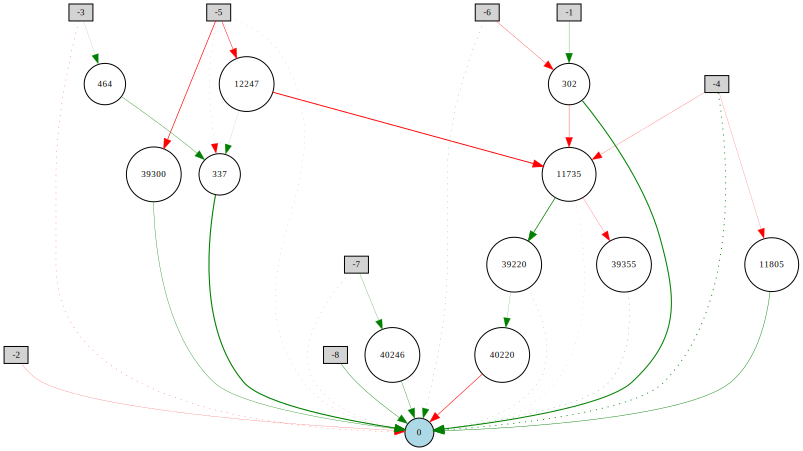

In [12]:
print("\nBest genome:\n{!s}".format(winner_list[0]))

import graphviz
from visualize import draw_net
config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )
draw_net(config, winner_list[0])

In [13]:
winner_net = neat.nn.FeedForwardNetwork.create(winner_list[0], config)
outputs = []
for xi, xo in zip(x_inputs, x_outputs):
    output = winner_net.activate(xi)
    outputs.append(output)
    print("input {!r}, expected output {!r}, got {!r}".format(
        xi, xo, output))

input (0.03238341968911917, 0.07124352331606217, 0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667), expected output (0.06476683937823834,), got [0.1704252024075854]
input (0.07124352331606217, 0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834), expected output (0.05181347150259067,), got [0.1322866031600276]
input (0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834, 0.05181347150259067), expected output (0.019430051813471502,), got [0.16191762423517442]
input (0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834, 0.05181347150259067, 0.019430051813471502), expected output (0.0,), got [0.1290347462175867]
input (0.23316062176165794, 0.3756476683937824, 0.18782383419

In [14]:
df=pd.read_csv('new_test_X.csv', sep=' ',header=None)
new_test_X = df.values
X_test_inputs = []
for i in range(len(new_test_X)):
    X_test_inputs.append(tuple(new_test_X[i]))

predictions_enn = []
for xi in X_test_inputs:
    output = winner_net.activate(xi)
    predictions_enn.append(output)

#np.savetxt(inputs + 'predictions_enn.csv', np.array(predictions_enn), delimiter=',')
real_y=pd.read_csv('new_test_Y.csv', sep=' ',header=None)
mse = np.sum((np.array(real_y) - predictions_enn)**2)/(len(predictions_enn))
mae = np.average(np.abs(np.array(real_y) - predictions_enn))
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.012071877992079528
MAE: 0.08692847128739613


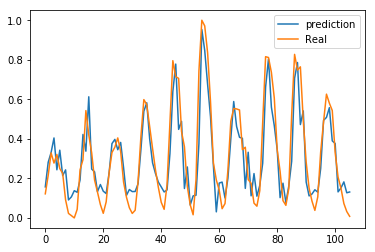

In [15]:
plt.plot(predictions_enn, label = 'prediction')
plt.plot(real_y, label = 'Real')
plt.legend()

In [40]:
net = neat.nn.FeedForwardNetwork.create(p.population[102], config)
for xi, xo in zip(x_inputs, x_outputs):
    output = net.activate(xi)
    print("pred:{} real:{}".format(output,xo))
    print("error:{}, adj error:{}".format(output[0] - xo[0],ad_fit(output[0] - xo[0])))
    #error -= ad_fit(output[0] - xo[0])

pred:[1.4782701533602096] real:(0.5287468233382603,)
error:0.9495233300219493, adj error:673557.0361753132
pred:[1.5239583555435159] real:(0.3112656780778837,)
error:1.2126926774656321, adj error:5594441937.105824
pred:[0.0] real:(0.12351577462940232,)
error:-0.12351577462940232, adj error:0.019179167715482236
pred:[0.9378426943080308] real:(0.15446949737954024,)
error:0.7833731969284905, adj error:6104.682268798438
pred:[0.0] real:(0.4671608643332532,)
error:-0.4671608643332532, adj error:5.762813801866517
pred:[0.0] real:(0.37850883451375716,)
error:-0.37850883451375716, adj error:1.2287560744043948
pred:[0.0] real:(0.016213595059167245,)
error:-0.016213595059167245, adj error:0.00026391930484327697
pred:[0.0] real:(0.5209752110142865,)
error:-0.5209752110142865, adj error:15.912769838690728
pred:[0.0] real:(0.08909815998130449,)
error:-0.08909815998130449, adj error:0.008942358054562236
pred:[1.1745414133357759] real:(0.36615604948972946,)
error:0.8083853638460464, adj error:11811.9

error:-0.6226437354040378, adj error:130.02370298250622
pred:[1.3469632641435192] real:(0.4985923414810972,)
error:0.848370922662422, adj error:35140.99498541058
pred:[0.0] real:(0.1322894990248645,)
error:-0.1322894990248645, adj error:0.022753927897820967
pred:[0.0] real:(0.13731064811380986,)
error:-0.13731064811380986, adj error:0.02501685153270118
pred:[1.3827329871748701] real:(0.2739764883608877,)
error:1.1087564988139824, adj error:125346547.2053472
pred:[0.0] real:(0.46841450378326177,)
error:-0.46841450378326177, adj error:5.896617278676763
pred:[0.0] real:(0.5877350405695168,)
error:-0.5877350405695168, adj error:61.468760159446155
pred:[0.8362148649094795] real:(0.4546124549983593,)
error:0.3816024099111202, adj error:1.2937615951875072
pred:[0.6621299649050486] real:(0.08410208142340292,)
error:0.5780278834816457, adj error:50.17300689995139
pred:[0.0] real:(0.29385771450461373,)
error:-0.29385771450461373, adj error:0.3153620798255751
pred:[0.0] real:(0.10052702294811051,

pred:[0.31102069266040944] real:(0.0518281154274736,)
error:0.2591925772329358, adj error:0.1840300861830067
pred:[0.880758716430701] real:(0.12603578437806065,)
error:0.7547229320526404, adj error:2925.7069228558817
pred:[2.304135148705832] real:(0.5019144737030878,)
error:1.8022206750027443, adj error:4.682081115673313e+21
pred:[0.0] real:(0.4517640171499576,)
error:-0.4517640171499576, adj error:4.3586843838407985
pred:[0.0] real:(0.4676949743349891,)
error:-0.4676949743349891, adj error:5.8194218346302256
pred:[1.188318560109841] real:(0.17446290486004654,)
error:1.0138556552497944, adj error:5106733.043775758
pred:[2.1958230767186517] real:(0.6745255689825751,)
error:1.5212975077360766, adj error:2760860479924632.0
pred:[0.0] real:(0.5317590526551411,)
error:-0.5317590526551411, adj error:19.656061217459026
pred:[0.0] real:(0.40646778142632495,)
error:-0.40646778142632495, adj error:1.9694210904068576
pred:[1.7802114696468623] real:(0.39268642746510507,)
error:1.3875250421817573, 

In [54]:
for i in range(1):
    print(i)
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        print(each,p.population[each].fitness)
        visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(i,each), fmt="jpg")

0
56 -0.10753527109183335
101 None
102 None
103 None
104 None
105 None
106 None
107 None
108 None
109 None
110 None
111 None
112 None
113 None
114 None
115 None
116 None
117 None
118 None
119 None
120 None
121 None
122 None
123 None
124 None
125 None
126 None
127 None
128 None
129 None
130 None
131 None
132 None
133 None
134 None
135 None
26 -0.06783252455099581
136 None
137 None
138 None
139 None
140 None
141 None
142 None
143 None
144 None
145 None
146 None
147 None
148 None
149 None
150 None
151 None
152 None
153 None
154 None
155 None
156 None
157 None
158 None
159 None
160 None
161 None
162 None
163 None
164 None
165 None
166 None
167 None
168 None
169 None
170 None
171 None
172 None
173 None
174 None
175 None
176 None
177 None
178 None
179 None
180 None
181 None
182 None
183 None
184 None
185 None
186 None
187 None
188 None
189 None
190 None
191 None
192 None
193 None
194 None
195 None
196 None
197 None
198 None


In [55]:
filenames = []
previous_id = 0
number_of_ids = 0
for i in range(2):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        #print(p.population[each])
        visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(i,each), fmt="jpg")

In [30]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(0))

for each in p.population:
    visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(0,each), fmt="jpg")

In [ ]:
visualize.draw_net(config, p.population[best_id], False, filename='rastrigin2_diff/'+str(number_of_ids), fmt="jpg")

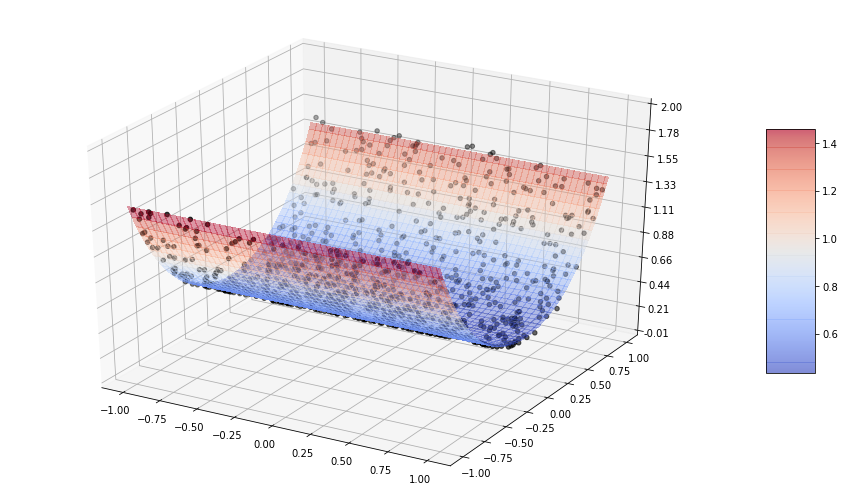

In [76]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1, 1, 0.02)
Y = np.arange(-1, 1, 0.02)
X, Y = np.meshgrid(X, Y)

OZ = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        a = np.array([X[i][j],Y[i][j]])
        OZ.append(winner_net.activate(tuple(a)))
OZ = np.array(OZ).reshape(X.shape)

Z = OZ*2
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)

# Customize the z axis.
ax.set_zlim(-0.01, 2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

outputs = []
for xi in x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0])
    y.append(x_inputs[i][1])
    z.append(outputs[i][0]*2)

ax.scatter(x, y, z, c='k', marker='o')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [62]:
xi = tuple([0,0])
xo = [tuple([0])]
output = winner_net.activate(xi)
print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output[0]))

input (0, 0), expected output [(0,)], got 0.31508827719592414


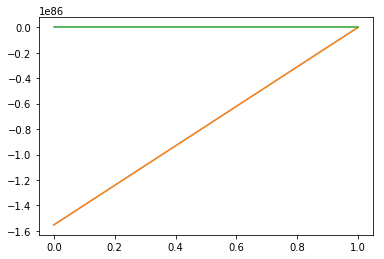

In [10]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()

In [36]:
def find_best_id(p):
    fitness_list = [] 
    for i in p.population:
        fitness = p.population[i].fitness
        if fitness != None:
            fitness_list.append(fitness)
        else:
            fitness_list.append(float("-inf"))
    #print(len(fitness_list))
    index = fitness_list.index(max(fitness_list))
    best_id = list(p.population.keys())[index]
    return best_id

In [37]:
filenames = []
previous_id = 0
number_of_ids = 0
for i in range(100):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i*10+9))
    best_id = find_best_id(p)
    if best_id != previous_id:
        print(best_id,p.population[best_id].fitness)
        previous_id = best_id
        number_of_ids += 1
        visualize.draw_net(config, p.population[best_id], False, filename='rastrigin2_diff/'+str(number_of_ids), fmt="jpg")
    # visualize.draw_net(config, p.population[best_id], False, filename=str(i))
    filenames.append('rastrigin2/'+str(i)+'.jpg')

738 -0.033509559449906925
1501 -0.031583252189696744
2748 -0.03139439378067297
4835 -0.030960564521020698
7175 -0.030750278761816283
7264 -0.030303181190576563
13099 -0.03026106129191053
18357 -0.03019326342914568
30356 -0.03000206519245573
32195 -0.0299823371902721
37008 -0.029981003740106805
44165 -0.02932885247127812
52722 -0.025398689940641747
59085 -0.0253865315306116
69191 -0.02506501640022899
91403 -0.0248860601164877


In [17]:
config.genome_config.input_keys

list